# Exploring the data
* Import data sets
* Initial visualization of them
* Count of input lines for each one.

## Import the datasets

In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
with open('dataset/categories.json', encoding='utf-8')  as cat:
    categorias = json.load(cat)

In [3]:
with open('dataset/products.json', encoding='utf-8') as prod:
    products = json.load(prod)

In [4]:
with open('dataset/stores.json', encoding='utf-8')  as sto:
    stores = json.load(sto)

## Initial display of them

In [5]:
for i, prod in enumerate(products):
    if i == 2:
        break
    name = prod['name']
    print(f'\n¡¡¡¡Datos del producto {name}!!!!')
    for key, value in prod.items():
        print(key, ":", value)


¡¡¡¡Datos del producto Duracell - AAA Batteries (4-Pack)!!!!
sku : 43900
name : Duracell - AAA Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333424019
category : [{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'}, {'id': 'pcmcat248700050021', 'name': 'Housewares'}, {'id': 'pcmcat303600050001', 'name': 'Household Batteries'}, {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]
shipping : 5.49
description : Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack
manufacturer : Duracell
model : MN2400B4Z
url : http://www.bestbuy.com/site/duracell-aaa-batteries-4-pack/43900.p?id=1051384074145&skuId=43900&cmp=RMXCC
image : http://img.bbystatic.com/BestBuy_US/images/products/4390/43900_sa.jpg

¡¡¡¡Datos del producto Duracell - AA 1.5V CopperTop Batteries (4-Pack)!!!!
sku : 48530
name : Duracell - AA 1.5V CopperTop Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333415017
category : [{'id': 'pcmcat312300050015', 

In [6]:
for i, sto in enumerate(stores):
    if i == 2:
        break
    name = sto['name']
    print(f'\n¡¡¡¡Datos del store {name}!!!!')
    for key, value in sto.items():
        print(key, ":", value)


¡¡¡¡Datos del store Mall of America!!!!
id : 1000
type : BigBox
name : Mall of America
address : 340 W Market
address2 : 
city : Bloomington
state : MN
zip : 55425
location : {'lat': 44.85466, 'lon': -93.24565}
hours : Mon: 10-9:30; Tue: 10-9:30; Wed: 10-9:30; Thurs: 10-9:30; Fri: 10-9:30; Sat: 10-9:30; Sun: 11-7
services : ['Geek Squad Services', 'Best Buy Mobile', 'Best Buy For Business', 'Apple Shop', 'Hablamos Español', 'Camera Experience Shop ', 'Electronics Recycling', 'Magnolia Home Theater', 'Samsung Experience Shop', 'Windows Store']

¡¡¡¡Datos del store Tempe Marketplace!!!!
id : 1002
type : BigBox
name : Tempe Marketplace
address : 1900 E Rio Salado Pkwy
address2 : 
city : Tempe
state : AZ
zip : 85281
location : {'lat': 33.430729, 'lon': -111.89966}
hours : Mon: 10-9; Tue: 10-9; Wed: 10-9; Thurs: 10-9; Fri: 10-10; Sat: 10-10; Sun: 10-8
services : ['Windows Store', 'Geek Squad Services', 'Best Buy Mobile', 'Best Buy For Business', 'Apple Shop', 'Electronics Recycling', 'Sams

In [7]:
for i, cat in enumerate(categorias):
    if i == 2:
        break
    name = cat['name']
    print(f'\n¡¡¡¡Datos de la categoria {name}!!!!')
    for key, value in cat.items():
        print(key, ":", value)


¡¡¡¡Datos de la categoria Gift Ideas!!!!
id : abcat0010000
name : Gift Ideas
path : [{'id': 'abcat0010000', 'name': 'Gift Ideas'}]
subCategories : [{'id': 'pcmcat140000050035', 'name': 'Capturing Photos & Videos'}, {'id': 'pcmcat140000050036', 'name': 'Listening to Digital Music'}, {'id': 'pcmcat140000050037', 'name': 'Computing Made Easy'}, {'id': 'pcmcat140000050039', 'name': 'Simple GPS Navigation'}, {'id': 'pcmcat140000050040', 'name': 'Playing Video Games'}, {'id': 'pcmcat140000050041', 'name': 'Watching HDTV'}, {'id': 'pcmcat140000050042', 'name': 'Enjoying Favorite Movies'}, {'id': 'abcat0012000', 'name': 'Him'}, {'id': 'abcat0011000', 'name': 'Her'}, {'id': 'abcat0013000', 'name': 'Teens'}, {'id': 'abcat0014000', 'name': 'Kids'}, {'id': 'pcmcat84000050001', 'name': 'Anniversaries'}, {'id': 'pcmcat84000050004', 'name': 'Baby Showers'}, {'id': 'pcmcat94300050028', 'name': 'Birthdays'}, {'id': 'pcmcat84000050002', 'name': 'Business Gifts'}, {'id': 'pcmcat84000050003', 'name': 'Gr

## Conteo de líneas de entrada por cadad uno.

In [10]:
print(f" Products amount: {len(products)}\n Stores amount: {len(stores)}\n Categories amount: {len(categorias)}")

 Products amount: 51646
 Stores amount: 1565
 Categories amount: 4584


# Descriptions analysis
* Count of characters, words of sentences and special characters.
* Normalization
* Count of most frequent words and less frequent words.
* Count of most frequent and least frequent ngrams
* Single letter word count

## Initial analysis

In [11]:
# Checking if sku is unique for each instance.
skus = []
for i, prod in enumerate(products):
    name = prod['name']
    for key, value in prod.items():
        if key == 'sku':
            skus.append(value)

buleano = len(set(skus))==len(products)
if buleano:
    text_bul = 'True'
else:
    text_bul = 'False'
print(f'It is {text_bul} that sku are unique values ​​per entry in the products dataset.')

It is True that sku are unique values ​​per entry in the products dataset.


In [12]:
# We extract each sku identifier and each description, category and image path in a data frame.
products_list = []
for prod in products:
    var = [prod['sku'], prod['name'], prod['description'], prod['category'], prod['image']]
    products_list.append(var)

products_df = pd.DataFrame(products_list, columns=['Skus', 'Name', 'Descriptions', 'Category', 'Image'])
products_df.head()

,Skus,Name,Descriptions,Category,Image
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...


In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51646 entries, 0 to 51645
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Skus          51646 non-null  int64 
 1   Name          51645 non-null  object
 2   Descriptions  51646 non-null  object
 3   Category      51646 non-null  object
 4   Image         51646 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [14]:
# Since only one line has missing values, we remove it and it won't affect the final model.
products_df.dropna(inplace=True)
products_df.reset_index(drop=True)
products_df.head()

,Skus,Name,Descriptions,Category,Image
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",http://img.bbystatic.com/BestBuy_US/images/pro...


In [15]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51645
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Skus          51645 non-null  int64 
 1   Name          51645 non-null  object
 2   Descriptions  51645 non-null  object
 3   Category      51645 non-null  object
 4   Image         51645 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


In [17]:
# In order to analyze each thing separately, we devide products_df into different dataframes.
products_descri_df = products_df.drop(['Name', 'Category', 'Image'], axis=1)
products_name_df = products_df.drop(['Descriptions', 'Category', 'Image'], axis=1)
products_categories_df = products_df.drop(['Name', 'Descriptions', 'Image'], axis=1)
products_images_df = products_df.drop(['Name', 'Descriptions', 'Category'], axis=1)

## Count of characters, words, sentences and special characters.

### Characters count

In [18]:
products_descri_df['Char Count'] = products_descri_df['Descriptions'].apply(len)
products_descri_df.head()

,Skus,Descriptions,Char Count
0,43900,Compatible with select electronic devices; AAA...,95
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112
2,127687,Compatible with select electronic devices; AA ...,94
3,150115,4-pack AA alkaline batteries; battery tester i...,53
4,185230,Compatible with select electronic devices; C s...,93


### Words count

In [19]:
def cant_palabras(oracion):
    palabras = oracion.split()
    cantidad = len(palabras)
    return cantidad
products_descri_df['Word Count'] = products_descri_df['Descriptions'].apply(cant_palabras)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count
0,43900,Compatible with select electronic devices; AAA...,95,12
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15
2,127687,Compatible with select electronic devices; AA ...,94,12
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7
4,185230,Compatible with select electronic devices; C s...,93,12


### Sentences count

In [20]:
import nltk
from nltk.tokenize import sent_tokenize
def cant_oraciones(descripcion):
    cant_oracion = len(sent_tokenize(descripcion))
    return cant_oracion

products_descri_df['Sentence Count'] = products_descri_df['Descriptions'].apply(cant_oraciones)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1
2,127687,Compatible with select electronic devices; AA ...,94,12,1
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1
4,185230,Compatible with select electronic devices; C s...,93,12,1


### Special characters count, only @ and #.

In [21]:
products_descri_df['Hashtag Count'] = products_descri_df['Descriptions'].map(lambda x: x.count("#"))
products_descri_df['@ Count'] = products_descri_df['Descriptions'].map(lambda x: x.count("@"))
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1,0,0
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1,0,0
2,127687,Compatible with select electronic devices; AA ...,94,12,1,0,0
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1,0,0
4,185230,Compatible with select electronic devices; C s...,93,12,1,0,0


### Ploting previous results.

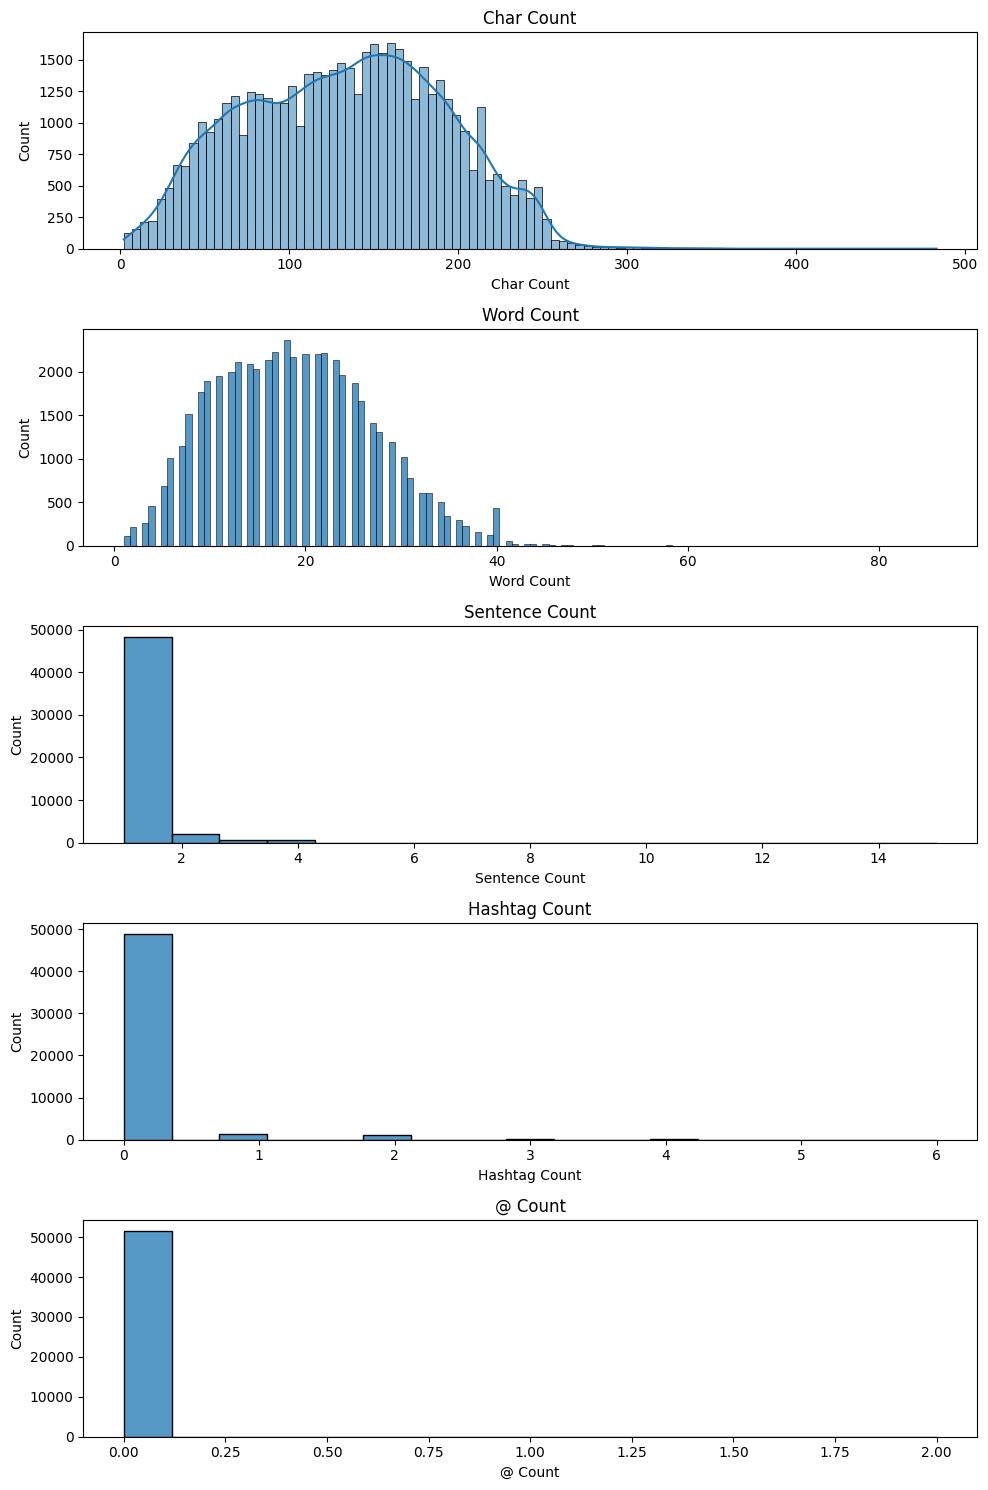

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 5 subgraphs
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Define the columns to plot
columnas = ['Char Count', 'Word Count', 'Sentence Count', 'Hashtag Count', '@ Count']

# Create KDE charts for first graph and the others without KDE.
for i, columna in enumerate(columnas):
    aux = i==0
    sns.histplot(data=products_descri_df, x=columna, ax=axes[i], kde=aux)
    axes[i].set_title(columna)

plt.tight_layout()

plt.show()


## Normalization

In [24]:
from src import text_normalizer
stop_words = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
# We visualize the initial state of descriptions.
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1,0,0
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1,0,0
2,127687,Compatible with select electronic devices; AA ...,94,12,1,0,0
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1,0,0
4,185230,Compatible with select electronic devices; C s...,93,12,1,0,0


In [29]:
# We normalize and replace the descriptions.
products_descri_df['Descriptions'] = text_normalizer.normalize_corpus(products_descri_df['Descriptions'], stopwords=stop_words, text_lemmatization=True)
products_descri_df.head()

c:\Users\pct3x\OneDrive\Documentos\AnyoneAI\Final Project\e_commerce_categorization\src\text_normalizer.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texto = BeautifulSoup(text, 'html.parser')


,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


In [30]:
# Since normalization takes a long time, we save it in the dataset folder as prod_descri_normalized.csv
products_descri_df.to_csv('dataset/prod_descri_normalized.csv',index=False)

In [27]:
# We read the normalized products descriptions.
products_descri_df = pd.read_csv('dataset/prod_descri_normalized.csv')
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


## Count of most frequent words and least frequent words.
* Creation of a one-dimensional corpus in order to carry out the counts.

### Creation of a one-dimensional corpus in order to carry out the counts.

In [28]:
corpus = [word for i in products_descri_df['Descriptions'].str.split().values.tolist() for word in i if (word not in stop_words)]

In [29]:
# Checking the corpus
corpus[0:5]

['compatible', 'select', 'electronic', 'device', 'aaa']

In [30]:
# Checking the number of words in the corpus
len(corpus)

803388

In [32]:
# Checking the number of unique words in the corpus
len(set(corpus))

18157

### Analysis of most frequent words

In [33]:
# From the corpus, we count the number of times each word appears.
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(n=None)
most_common_df = pd.DataFrame(most_common, columns=['Word', 'Count'])
most_common_df.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


In [34]:
# We filter only the first 60 most common words and plot them in a bar graph.
from nltk.probability import FreqDist
common_num = 60
most_common_plot = most_common_df[0:common_num+1].copy()
most_common_plot.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


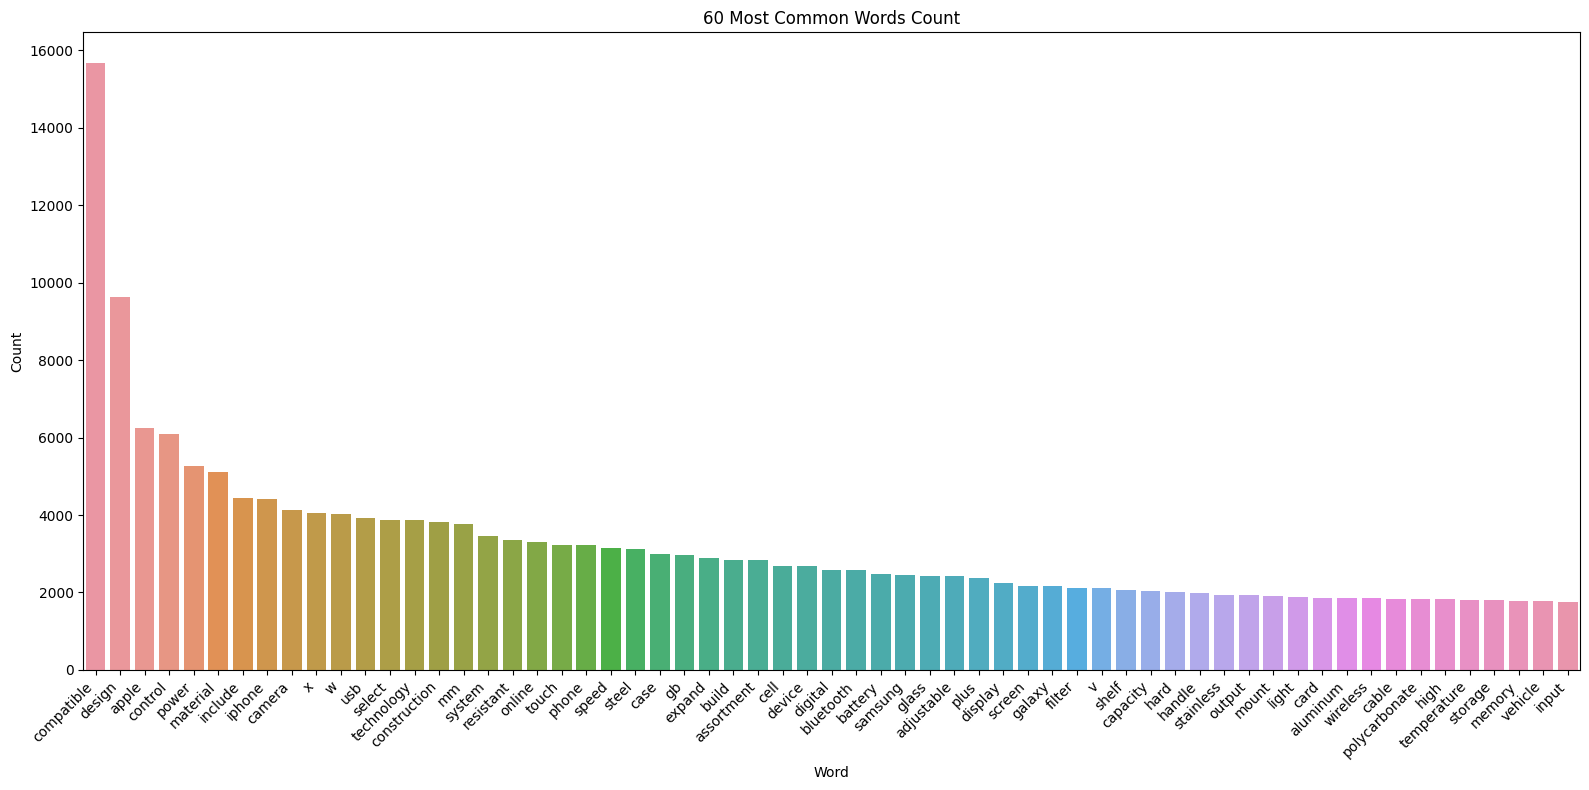

In [35]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Most Common Words Count'
sns.barplot(data=most_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of less frequent words

In [36]:
least_common_df = most_common_df.sort_values('Count', ascending=True)
least_common_df.reset_index(inplace=True)
least_common_df.drop('index', axis=1, inplace=True)
least_common_df.head()

,Word,Count
0,hid,1
1,summers,1
2,wise,1
3,publication,1
4,berklee,1


In [37]:
# We filter only 60 words to plot the least common words
common_num = 60
least_common_plot = least_common_df[0:common_num+1].copy()
least_common_plot.head()

,Word,Count
0,hid,1
1,summers,1
2,wise,1
3,publication,1
4,berklee,1


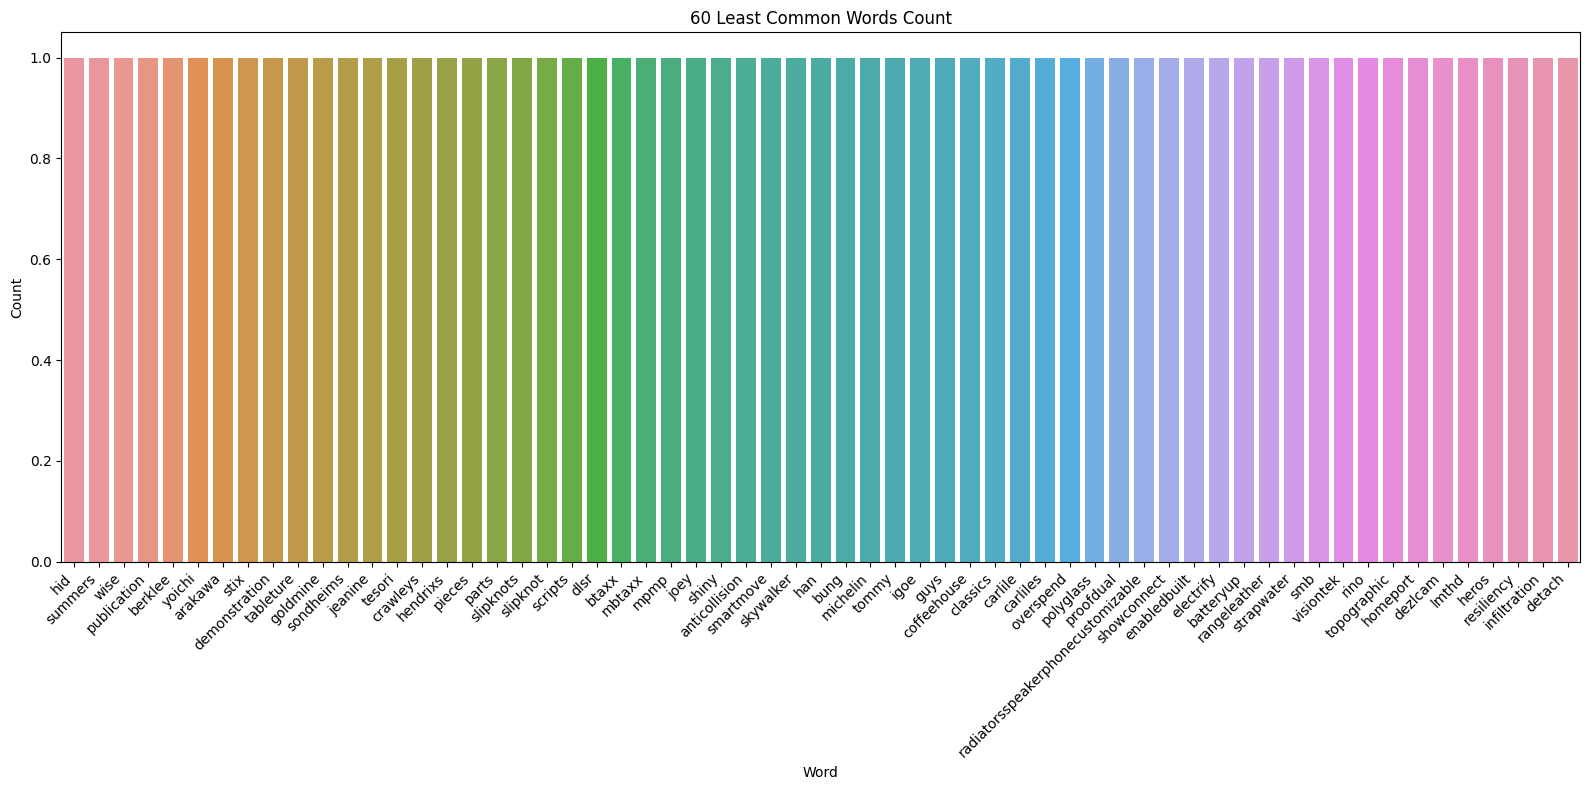

In [38]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Least Common Words Count'
sns.barplot(data=least_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
# Since there are to many words in the descriptions that only apears once, i just counted how many are there.
len(least_common_df[least_common_df['Count']==1])
# There are 5339 words that only occur once in all the descriptions together.

5339

## Count of most frequent and least frequent ngrams
* Sort products_descri_df according to the number of words (Words Count)
* Determine amount of numbers of words to group.
* Divide the dataframe not in equal parts by lines, but in equal parts according to the accumulation of words.
* Implement bigram analysis in each part.
* Implement trigram analysis in each part.

### Sort products_descri_df by number of words (Words Count)

In [40]:
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


In [41]:
products_descri_df.sort_values('Word Count', inplace=True, ascending=False)
products_descri_df.reset_index(inplace=True, drop=True)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,3721708,need help set learn basic new camera camcorder...,483,86,3,0,0
1,3630079,music make happy mp player make ecstatic geek ...,377,74,6,0,0
2,3721726,music make happy mp player make ecstatic geek ...,393,73,6,0,0
3,5352025,add comfort touch work z line design task chai...,358,61,5,0,0
4,1319418,geek squad installer quickly professionally co...,338,58,2,0,0


### Determine amount of number of words to group.

In [42]:
tot_palabras = products_descri_df['Word Count'].sum()
tot_palabras

970414

In [43]:
target_palabras = tot_palabras//8
target_palabras

121301

### Split the dataframe not equally by lines, but equally by word count.
* We need to do this since making a Bigram analisys with all the descriptions at once, takes like 64 GB RAM memory. So we will devide the dataframes, make Bigram analisys and filter only the most frequent.

In [44]:
dataframe_list = []

current_sum = 0
current_dataframe = pd.DataFrame(columns=products_descri_df.columns)

for index, row in products_descri_df.iterrows():
    current_sum += row['Word Count']
    current_dataframe = pd.concat([current_dataframe, pd.DataFrame(row).transpose()])

    if current_sum >= target_palabras:
        dataframe_list.append(current_dataframe)
        current_dataframe = pd.DataFrame(columns=products_descri_df.columns)
        current_sum = 0

if len(current_dataframe) > 0:
    dataframe_list.append(current_dataframe)

In [45]:
len(dataframe_list)

8

In [47]:
# Checking the firts dataframe
dataframe_list[0].head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,3721708,need help set learn basic new camera camcorder...,483,86,3,0,0
1,3630079,music make happy mp player make ecstatic geek ...,377,74,6,0,0
2,3721726,music make happy mp player make ecstatic geek ...,393,73,6,0,0
3,5352025,add comfort touch work z line design task chai...,358,61,5,0,0
4,1319418,geek squad installer quickly professionally co...,338,58,2,0,0


### Implement bigram analysis in each part.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
def get_ngram_freq(n, df, argu):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=(n,n))

    bow = vec.fit_transform(df[argu])

    count_values = bow.toarray().sum(axis=0)

    ngram_freq = pd.DataFrame([(count_values[i], k) for k, i in vec.vocabulary_.items()])
    ngram_freq.columns = ["frequency", "ngram"]
    ngram_freq.sort_values(by = "frequency",  ascending = False, inplace = True)

    return ngram_freq

In [49]:
bigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    bigram_aux = get_ngram_freq(2, dafra, 'Descriptions')
    bigram_dataframe = pd.concat([bigram_dataframe, bigram_aux[0:1000]], axis=0)

bigram_dataframe.head()

,frequency,ngram
274,1161,best buy
2970,1113,gift card
2974,740,buy gift
1669,699,apple iphone
2984,386,puerto rico


In [50]:
# Only survived the 1000 most frequent bigrams in each dataframe and since there are 8 dataframes, we get 8000 bigrams.
len(bigram_dataframe)

8000

In [51]:
# We group the bigrams by name and add them up.
bigram_dataframe_grouped = bigram_dataframe.groupby('ngram').sum()
bigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
bigram_dataframe_grouped.reset_index(inplace=True)
bigram_dataframe_grouped.head()

,ngram,frequency
0,apple iphone,3952
1,compatible apple,3040
2,expand online,2830
3,online assortment,2829
4,cell phone,2481


In [52]:
bigram_dataframe_grouped.tail()

,ngram,frequency
3891,way speaker,9
3892,broil system,9
3893,legendary story,9
3894,vacuum hepa,9
3895,technology vari,9


In [53]:
len(bigram_dataframe_grouped)

3896

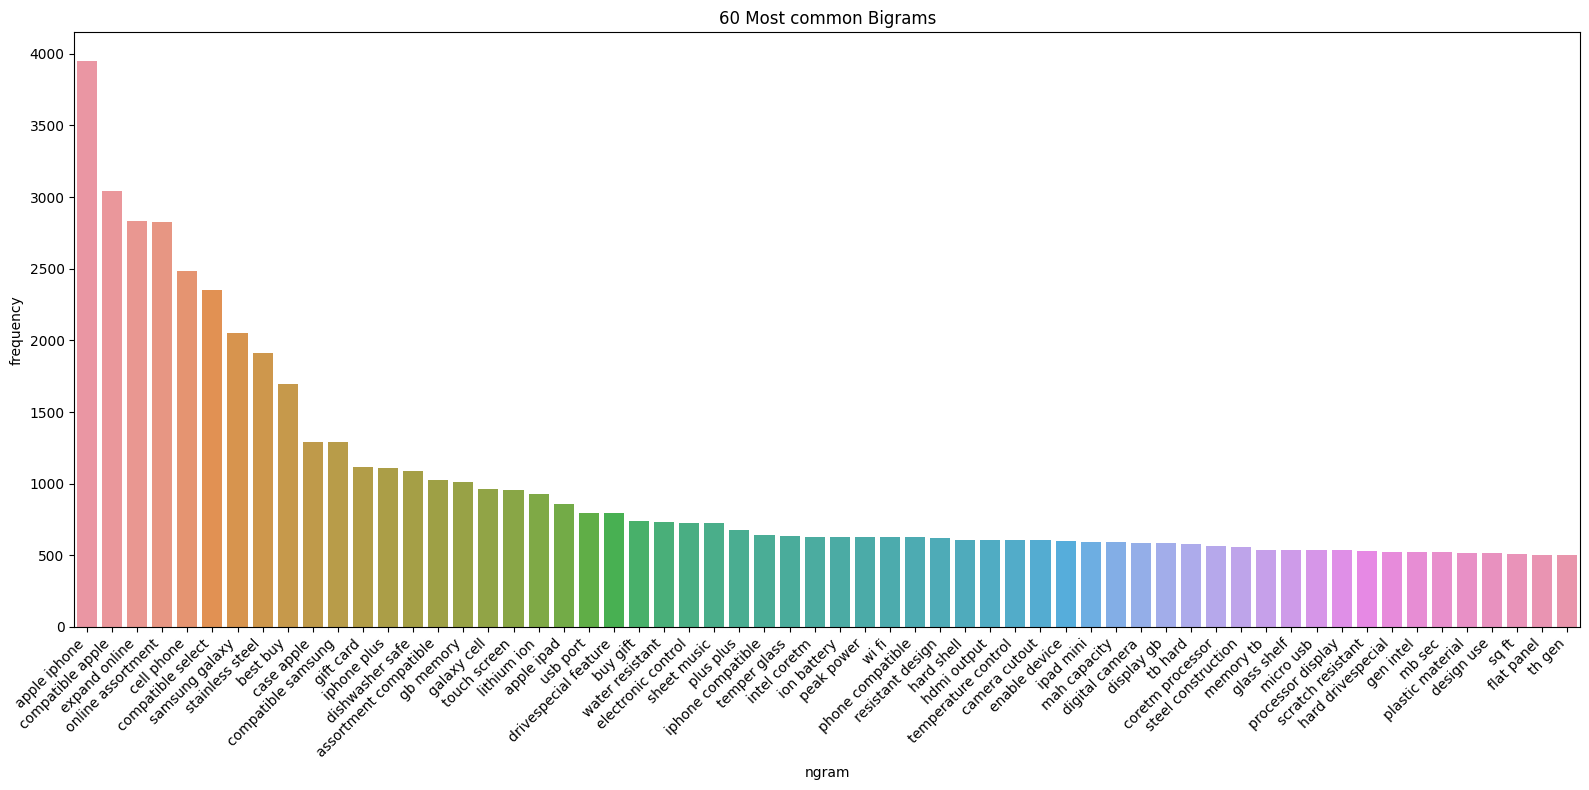

In [54]:
val_max = 60
ngram_grouped_plot = bigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Bigrams'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Implement trigram analysis in each part.

In [55]:
# From the 8 dataframes devided before, we make the trigram analisys.
trigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    trigram_data_aux = get_ngram_freq(3, dafra, 'Descriptions')
    trigram_dataframe = pd.concat([trigram_dataframe, trigram_data_aux[0:1000]], axis=0)

trigram_dataframe.head()

,frequency,ngram
3179,740,buy gift card
3178,740,best buy gift
780,373,best buy store
3187,372,purchase online us
3188,372,online us puerto


In [56]:
len(trigram_dataframe)

8000

In [57]:
# We group the trigrams by their names and sort them in descending order.

trigram_dataframe_grouped = trigram_dataframe.groupby('ngram').sum()
trigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
trigram_dataframe_grouped.reset_index(inplace=True)
trigram_dataframe_grouped.head()

,ngram,frequency
0,expand online assortment,2829
1,compatible apple iphone,2069
2,compatible samsung galaxy,1238
3,case apple iphone,1137
4,online assortment compatible,1026


In [58]:
len(trigram_dataframe_grouped)

5163

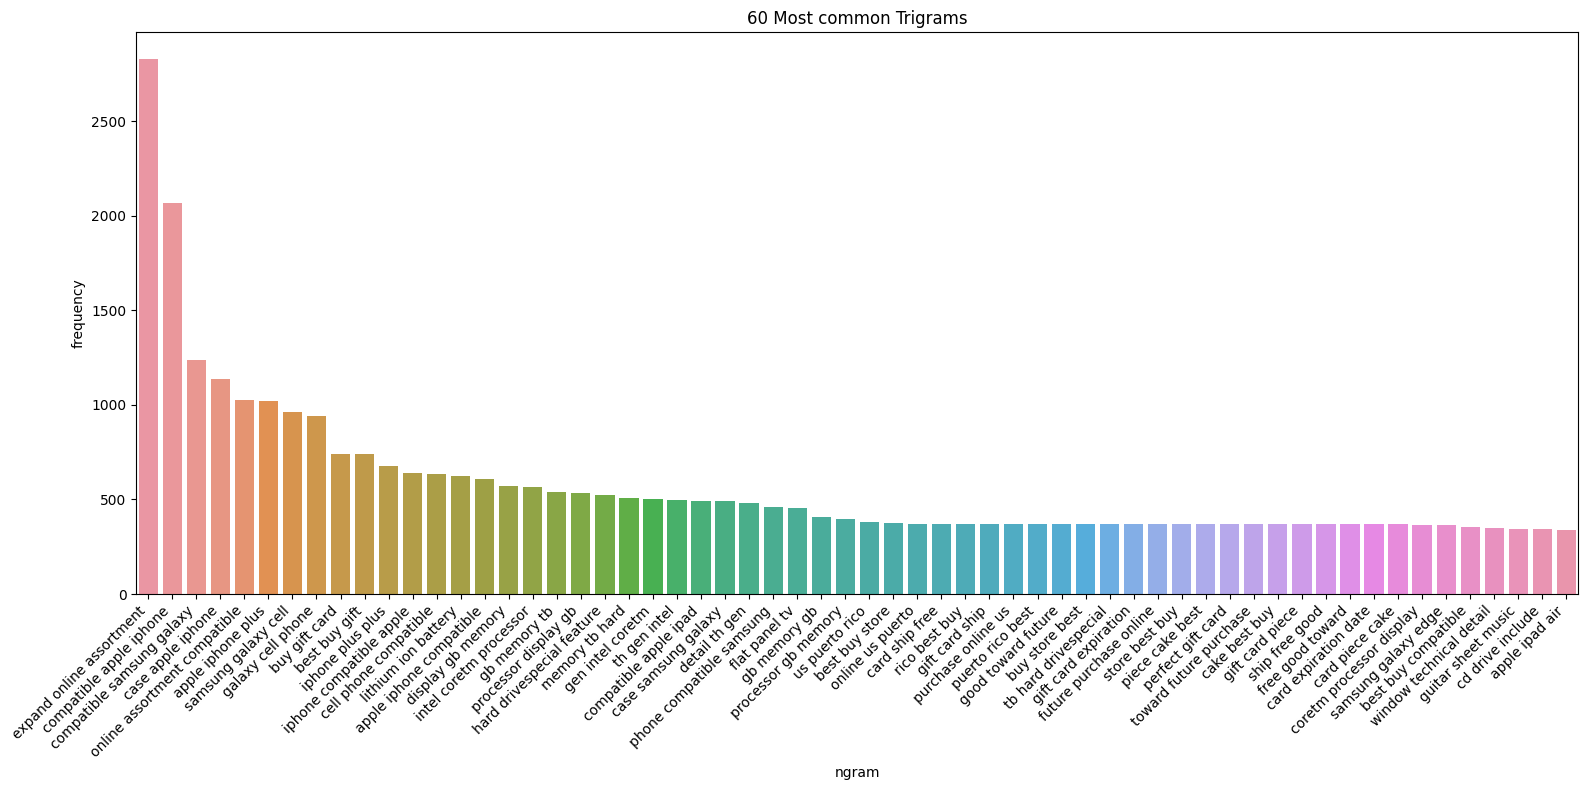

In [59]:
val_max = 60
ngram_grouped_plot = trigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Trigrams'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Single letter word count.

In [61]:
# We take the dataframe that contains the count of each word in the corpus.
most_common_df.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


In [62]:
# We filter only to analise the words with length == 1
most_common_single_letter = [[word, count] for word, count in zip(most_common_df['Word'], most_common_df['Count']) if len(word) == 1]
most_common_single_letter = pd.DataFrame(most_common_single_letter, columns=['Word', 'Count'])
most_common_single_letter.head()

,Word,Count
0,x,4064
1,w,4029
2,v,2106
3,g,1221
4,p,658


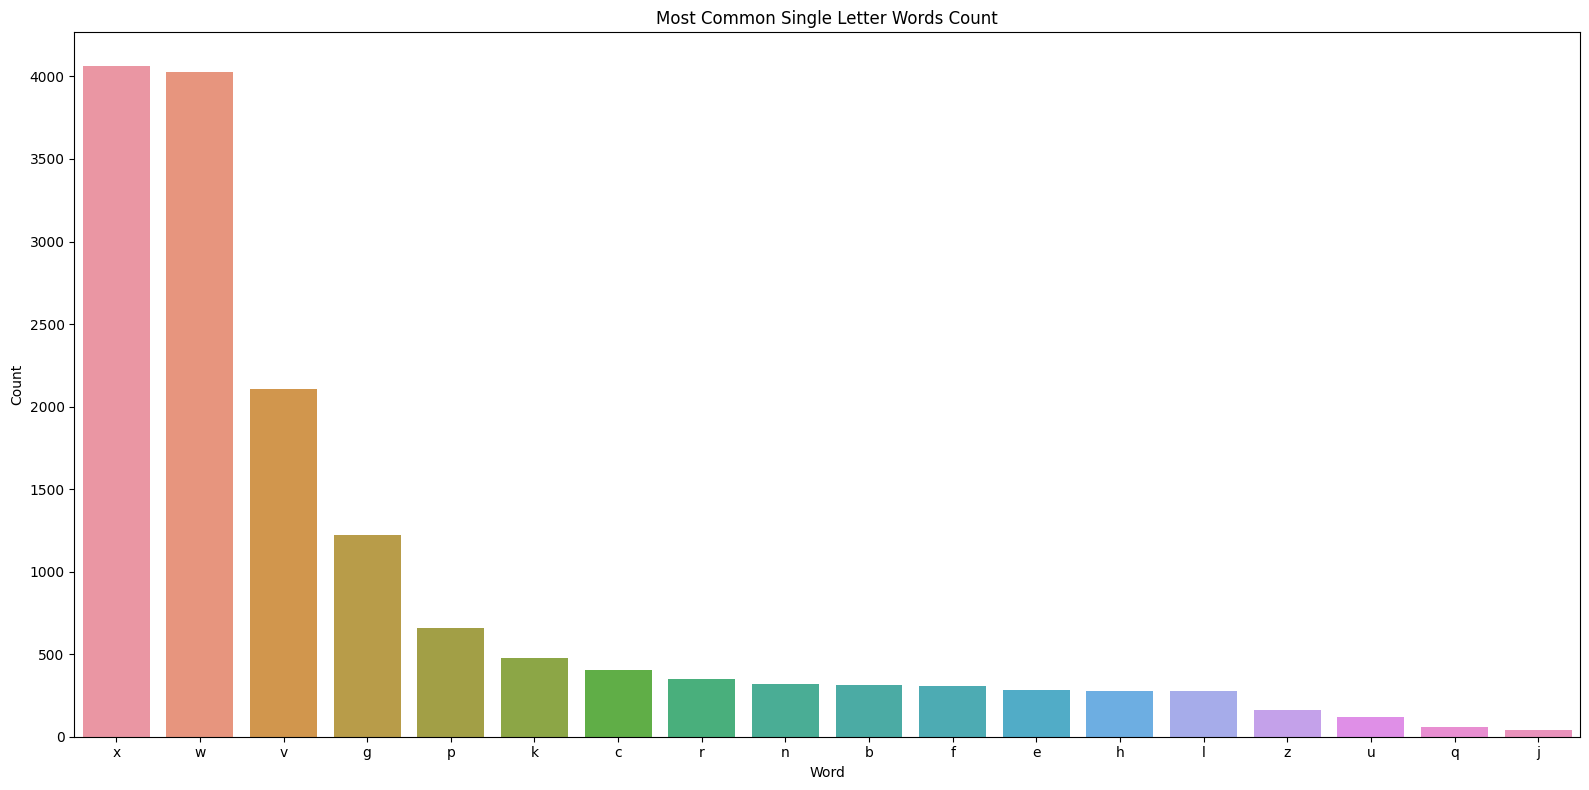

In [63]:
# We plot the frequency of each letter.
plt.figure(figsize=(16,8))
Title = 'Most Common Single Letter Words Count'
sns.barplot(data=most_common_single_letter, x='Word', y='Count')
plt.title(Title)
plt.tight_layout()
plt.show()

# Name analisys
* Count of characters, words, sentences and special characters.
* Normalization
* Count of most frequent words and least frequent words.
* Count of most frequent and least frequent ngrams
* Single letter word count.

### Initial analysis

In [65]:
# We'll analise the names of each products from the dataframe that contains the names.
products_name_df.head()

,Skus,Name
0,43900,Duracell - AAA Batteries (4-Pack)
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack)
2,127687,Duracell - AA Batteries (8-Pack)
3,150115,Energizer - MAX Batteries AA (4-Pack)
4,185230,Duracell - C Batteries (4-Pack)


In [66]:
len(products_name_df)

51645

In [67]:
products_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51645
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Skus    51645 non-null  int64 
 1   Name    51645 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


## Count of characters, words, sentences and special characters.

### Characters count.

In [68]:
products_name_df['Char Count'] = products_name_df['Name'].apply(len)
products_name_df.head()

,Skus,Name,Char Count
0,43900,Duracell - AAA Batteries (4-Pack),33
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47
2,127687,Duracell - AA Batteries (8-Pack),32
3,150115,Energizer - MAX Batteries AA (4-Pack),37
4,185230,Duracell - C Batteries (4-Pack),31


### Words count

In [69]:
def cant_palabras(oracion):
    palabras = oracion.split()
    cantidad = len(palabras)
    return cantidad
products_name_df['Word Count'] = products_name_df['Name'].apply(cant_palabras)
products_name_df.head()

,Skus,Name,Char Count,Word Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7
2,127687,Duracell - AA Batteries (8-Pack),32,5
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6
4,185230,Duracell - C Batteries (4-Pack),31,5


### Sentences count

In [70]:
import nltk
from nltk.tokenize import sent_tokenize
def cant_oraciones(descripcion):
    cant_oracion = len(sent_tokenize(descripcion))
    return cant_oracion

products_name_df['Sentence Count'] = products_name_df['Name'].apply(cant_oraciones)
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1
2,127687,Duracell - AA Batteries (8-Pack),32,5,1
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1
4,185230,Duracell - C Batteries (4-Pack),31,5,1


### Spetial characters count. Only # and @.

In [71]:
products_name_df['Hashtag Count'] = products_name_df['Name'].map(lambda x: x.count("#"))
products_name_df['@ Count'] = products_name_df['Name'].map(lambda x: x.count("@"))
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1,0,0
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1,0,0
2,127687,Duracell - AA Batteries (8-Pack),32,5,1,0,0
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1,0,0
4,185230,Duracell - C Batteries (4-Pack),31,5,1,0,0


### Ploting the previus results.

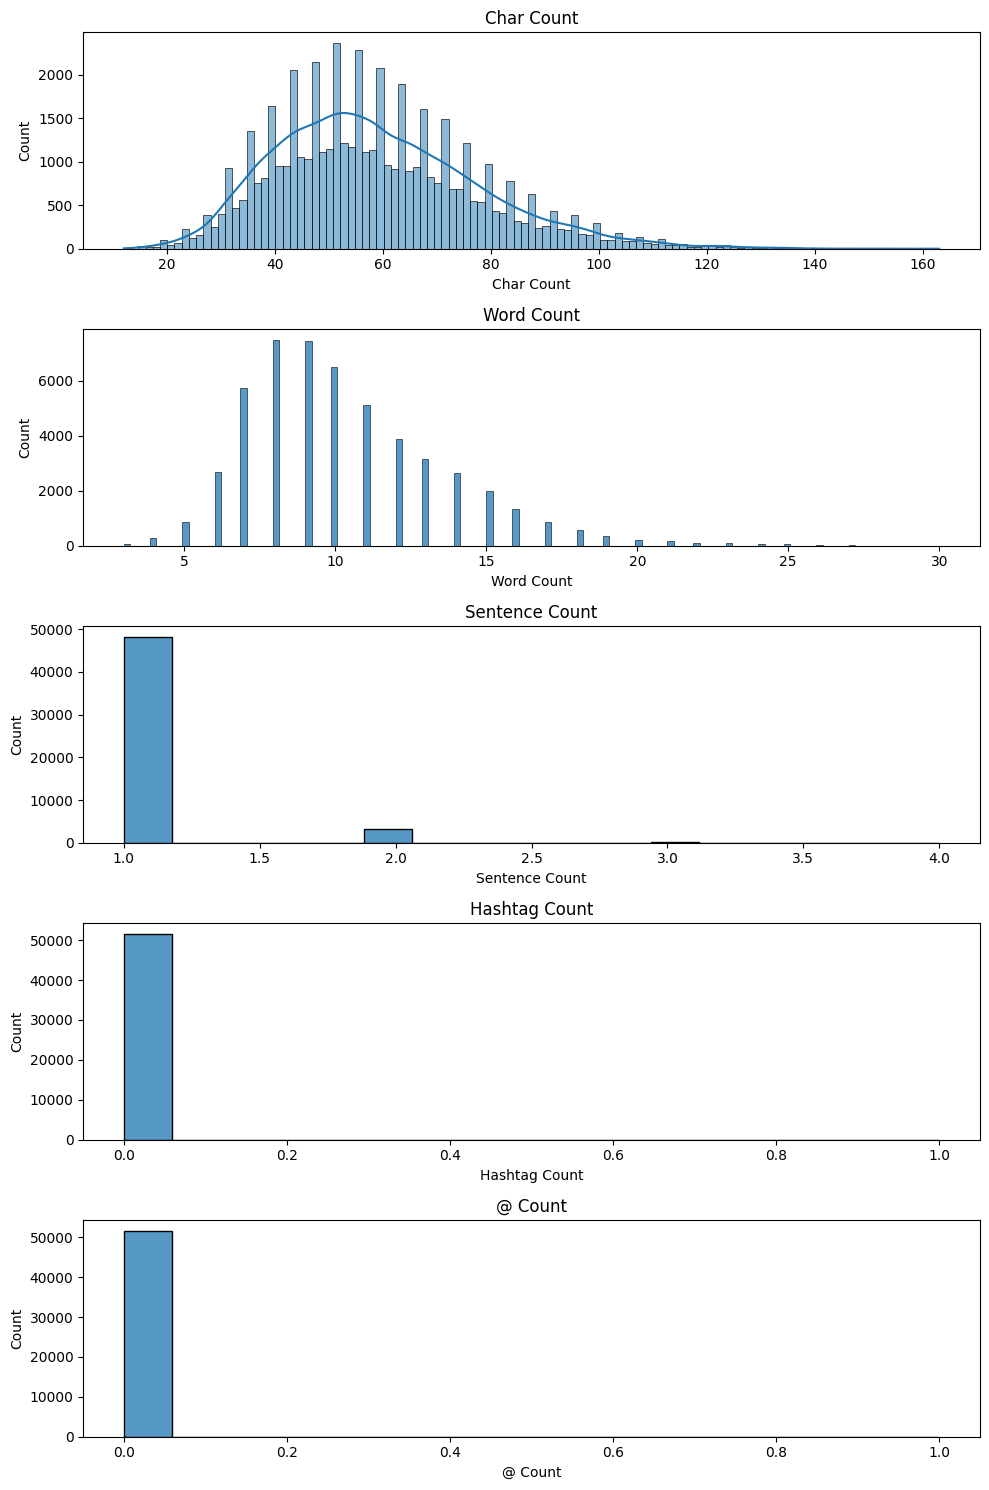

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 5 subgraphs
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Define the columns to plot
columnas = ['Char Count', 'Word Count', 'Sentence Count', 'Hashtag Count', '@ Count']

# Create KDE charts for the first graph and the others witout KDE.
for i, columna in enumerate(columnas):
    aux = i==0
    sns.histplot(data=products_name_df, x=columna, ax=axes[i], kde=aux)
    axes[i].set_title(columna)

plt.tight_layout()

plt.show()

## Normlization

In [74]:
# We vesialize the prevous state of the dataframe Name colum before normalization.
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1,0,0
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1,0,0
2,127687,Duracell - AA Batteries (8-Pack),32,5,1,0,0
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1,0,0
4,185230,Duracell - C Batteries (4-Pack),31,5,1,0,0


In [76]:
products_name_df['Name'] = text_normalizer.normalize_corpus(products_name_df['Name'], stopwords=stop_words, text_lemmatization=True)
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,duracell aaa batteries pack,33,5,1,0,0
1,48530,duracell aa v coppertop batteries pack,47,7,1,0,0
2,127687,duracell aa batteries pack,32,5,1,0,0
3,150115,energizer max batteries aa pack,37,6,1,0,0
4,185230,duracell c batteries pack,31,5,1,0,0


In [ ]:
# We save the dataframe in a csv file since it takes a long time to implement the normalization. The name of the csv file is prod_names_normalized.csv saved in the dataset folder.
products_name_df.to_csv('dataset/prod_names_normalized.csv',index=False)

In [77]:
# We read the normalized dataframe from the dataset folder.
products_name_df = pd.read_csv('dataset/prod_names_normalized.csv')
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,duracell aaa batteries pack,33,5,1,0,0
1,48530,duracell aa v coppertop batteries pack,47,7,1,0,0
2,127687,duracell aa batteries pack,32,5,1,0,0
3,150115,energizer max batteries aa pack,37,6,1,0,0
4,185230,duracell c batteries pack,31,5,1,0,0


## Count of most frequent words and least frequent words.
* Creation of a one-dimensional corpus in order to carry out the counts.

In [78]:
# We create the corpus to analise the products name data.
corpus_names = [word for i in products_name_df['Name'].str.split().values.tolist() for word in i if (word not in stop_words)]

In [80]:
# Checking the corpus names.
corpus_names[0:5]

['duracell', 'aaa', 'batteries', 'pack', 'duracell']

In [81]:
# Checking the corpus names len.
len(corpus_names)

394891

In [82]:
# Chenking the number of unique names in the corpus.
len(set(corpus_names))

14182

### Analysis of most frequent words

In [83]:
# We count the amount of times each word is used in the corpus name.
from nltk.probability import FreqDist
most_common_names = FreqDist(corpus_names).most_common(n=None)
most_common_names_df = pd.DataFrame(most_common_names, columns=['Word', 'Count'])
most_common_names_df.head()

,Word,Count
0,black,18805
1,white,5946
2,case,4991
3,apple,4617
4,pre,3636


In [84]:
# We decide to plot the first 60 most frequent words in the corpus name.
from nltk.probability import FreqDist
common_num = 60
most_common_plot = most_common_names_df[0:common_num+1].copy()
most_common_plot.head()

,Word,Count
0,black,18805
1,white,5946
2,case,4991
3,apple,4617
4,pre,3636


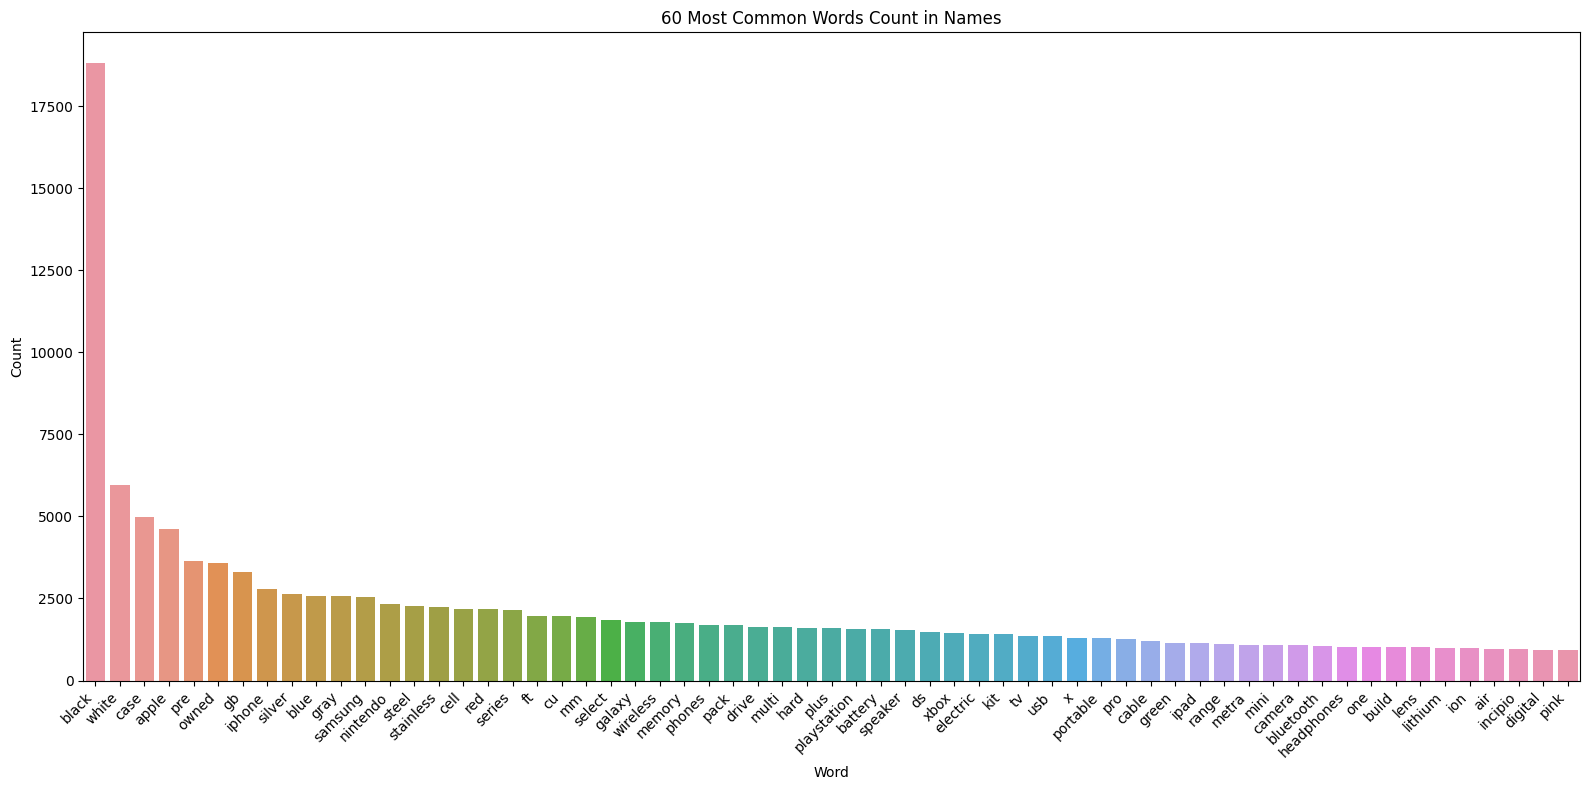

In [85]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Most Common Words Count in Names'
sns.barplot(data=most_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of least frequent words

In [86]:
least_common_names_df = most_common_names_df.sort_values('Count', ascending=True)
least_common_names_df.reset_index(inplace=True)
least_common_names_df.drop('index', axis=1, inplace=True)
least_common_names_df.head()

,Word,Count
0,wicking,1
1,clamps,1
2,stance,1
3,langdon,1
4,hills,1


In [87]:
len(least_common_names_df[least_common_names_df['Count']==1])
# There are 4641 words that only occur once in all the descriptions together.

4641

## Count of most frequent and least frequent ngrams
* Sort most_common_names_df according to the number of words (Words Count)
* Determine amount of numbers of words to group.
* Divide the dataframe not in equal parts by lines, but in equal parts according to the accumulation of words.
* Implement bigram analysis in each part.
* Implement trigram analysis in each part.

### Sort most_common_names_df by number of words (Words Count)

In [88]:
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,duracell aaa batteries pack,33,5,1,0,0
1,48530,duracell aa v coppertop batteries pack,47,7,1,0,0
2,127687,duracell aa batteries pack,32,5,1,0,0
3,150115,energizer max batteries aa pack,37,6,1,0,0
4,185230,duracell c batteries pack,31,5,1,0,0


In [89]:
products_name_df.sort_values('Word Count', inplace=True, ascending=False)
products_name_df.reset_index(inplace=True, drop=True)
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,4969300,msi gs ghost pro k k ultra hd laptop intel cor...,142,30,1,0,0
1,4924100,lg class diag lead p smart k ultra hd tv high ...,116,28,2,0,0
2,4968032,msi gts titan sli laptop intel core gb memory ...,133,28,1,0,0
3,7723029,epson professional enhanced matte inkjet paper...,163,28,1,0,0
4,4754317,cybertronpc vapor sk x k ultra hd laptop intel...,134,28,1,0,0


### Determine amount of number of words to group.

In [90]:
tot_palabras = products_name_df['Word Count'].sum()
tot_palabras

533345

In [91]:
target_palabras = tot_palabras//8
target_palabras

66668

### Split the dataframe not equally by lines, but equally by word count.
* We need to do this since making a Bigram analisys with all the names at once, takes a lot of RAM memmory. So we will devide the dataframe, make Bigram analisys and filter only the most frequent.

In [92]:
dataframe_list = []

current_sum = 0
current_dataframe = pd.DataFrame(columns=products_name_df.columns)

for index, row in products_name_df.iterrows():
    current_sum += row['Word Count']
    current_dataframe = pd.concat([current_dataframe, pd.DataFrame(row).transpose()])

    if current_sum >= target_palabras:
        dataframe_list.append(current_dataframe)
        current_dataframe = pd.DataFrame(columns=products_name_df.columns)
        current_sum = 0

if len(current_dataframe) > 0:
    dataframe_list.append(current_dataframe)

In [93]:
# Chenking the first dataframe.
dataframe_list[0].head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,4969300,msi gs ghost pro k k ultra hd laptop intel cor...,142,30,1,0,0
1,4924100,lg class diag lead p smart k ultra hd tv high ...,116,28,2,0,0
2,4968032,msi gts titan sli laptop intel core gb memory ...,133,28,1,0,0
3,7723029,epson professional enhanced matte inkjet paper...,163,28,1,0,0
4,4754317,cybertronpc vapor sk x k ultra hd laptop intel...,134,28,1,0,0


### Implement bigram analysis in each part.

In [94]:
bigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    bigram_aux = get_ngram_freq(2, dafra, 'Name')
    bigram_dataframe = pd.concat([bigram_dataframe, bigram_aux[0:1000]], axis=0)

bigram_dataframe.head()

,frequency,ngram
9,945,gb memory
12,694,hard drive
7,612,intel core
110,592,apple iphone
315,558,case apple


In [95]:
len(bigram_dataframe)

8000

In [96]:
# We group the bigrams by their names and sort them in descending order.
bigram_dataframe_grouped = bigram_dataframe.groupby('ngram').sum()
bigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
bigram_dataframe_grouped.reset_index(inplace=True)
bigram_dataframe_grouped.head()

,ngram,frequency
0,pre owned,3589
1,apple iphone,2589
2,case apple,2551
3,stainless steel,2127
4,cu ft,1943


In [97]:
len(bigram_dataframe_grouped)

4291

In [98]:
bigram_dataframe_grouped.tail()

,ngram,frequency
4286,weather adirondack,5
4287,gaelan umbrella,5
4288,blender blue,5
4289,cokin pro,5
4290,squad smart,5


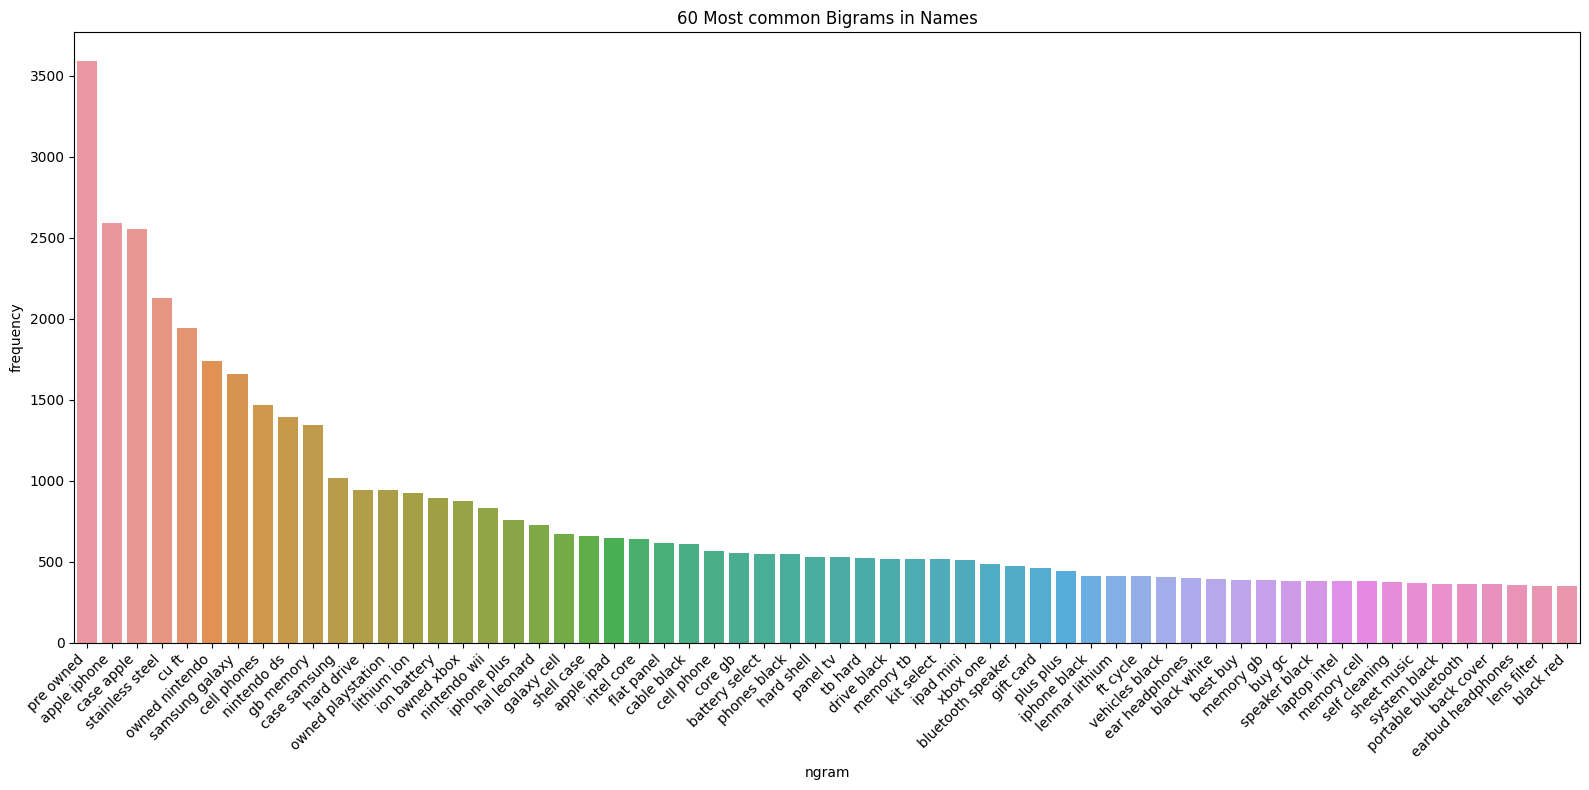

In [99]:
# We plot the 60 most frequent bigrams in the names dataset.
val_max = 60
ngram_grouped_plot = bigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Bigrams in Names'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Implement trigram analysis in each part.

In [100]:
trigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    trigram_data_aux = get_ngram_freq(3, dafra, 'Name')
    trigram_dataframe = pd.concat([trigram_dataframe, trigram_data_aux[0:1000]], axis=0)

trigram_dataframe.head()

,frequency,ngram
7,546,intel core gb
8,517,core gb memory
9,499,gb memory tb
11,467,tb hard drive
10,439,memory tb hard


In [101]:
len(trigram_dataframe)

8000

In [102]:
# We group the trigrams by their names and sort them in descending order.
trigram_dataframe_grouped = trigram_dataframe.groupby('ngram').sum()
trigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
trigram_dataframe_grouped.reset_index(inplace=True)
trigram_dataframe_grouped.head()

,ngram,frequency
0,case apple iphone,2021
1,pre owned nintendo,1741
2,owned nintendo ds,1098
3,case samsung galaxy,1017
4,pre owned playstation,940


In [103]:
len(trigram_dataframe_grouped)

5423

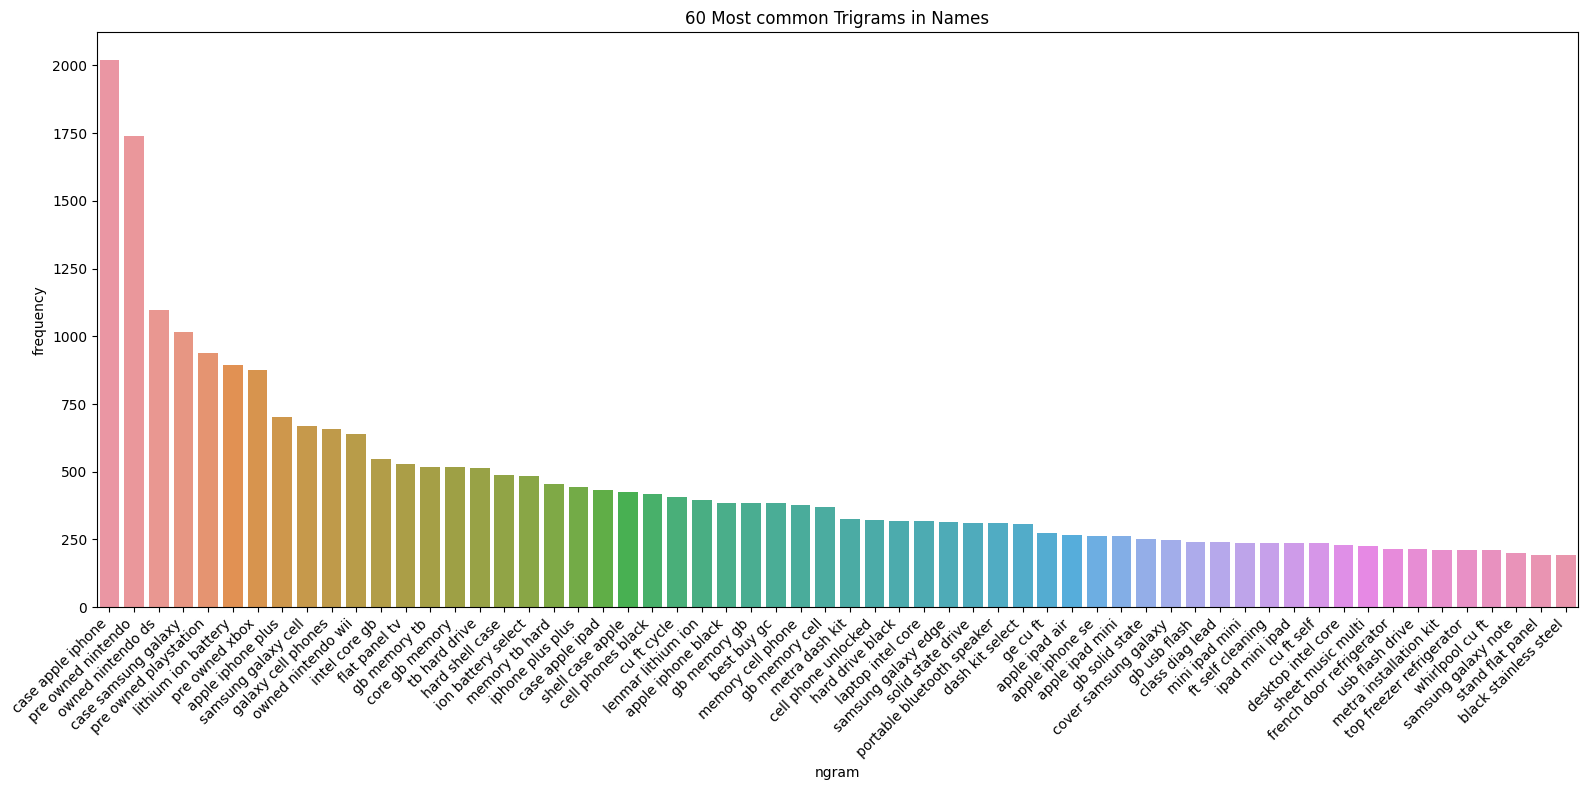

In [104]:
# We plot the 60 most frequent trigrams in the dataset.
val_max = 60
ngram_grouped_plot = trigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Trigrams in Names'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Single letter word count

In [105]:
# Checking the most common names dataframe in the corpus.
most_common_names_df.head()

,Word,Count
0,black,18805
1,white,5946
2,case,4991
3,apple,4617
4,pre,3636


In [106]:
# We filter them to get only the most common single letter words.
most_common_names_df = most_common_names_df[most_common_names_df['Count'] > 1]
most_common_single_letter = [[word, count] for word, count in zip(most_common_names_df['Word'], most_common_names_df['Count']) if len(word) == 1]
most_common_single_letter = pd.DataFrame(most_common_single_letter, columns=['Word', 'Count'])
most_common_single_letter.head()

,Word,Count
0,x,1307
1,g,850
2,w,767
3,k,558
4,v,526


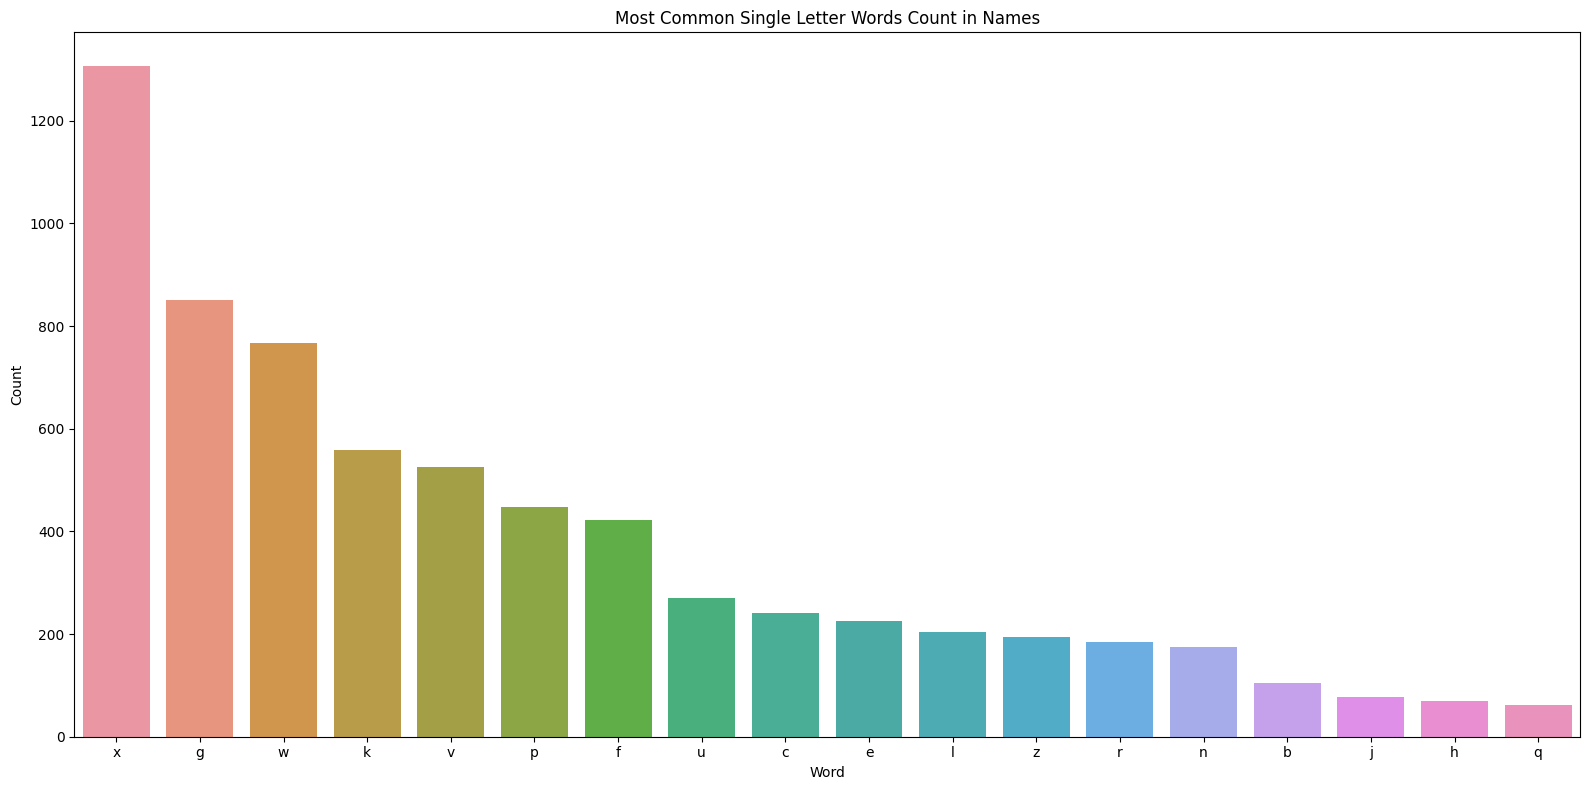

In [107]:
# We plot the most common single letter words in the names.
plt.figure(figsize=(16,8))
Title = 'Most Common Single Letter Words Count in Names'
sns.barplot(data=most_common_single_letter, x='Word', y='Count')
plt.title(Title)
plt.tight_layout()
plt.show()

# Category Analysis
* Check the categories of the dataset products.
* Analyze which categories are more frequent.
* Analyze which categories are less frequent.

In [108]:
# Chenking the products categories dataframe.
products_categories_df.head()

,Skus,Category
0,43900,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [109]:
categorias_list = []
categorias_list = [cat.values() for element in products_categories_df['Category'] for cat in element]
categorias_list[0:3]

[dict_values(['pcmcat312300050015', 'Connected Home & Housewares']),
 dict_values(['pcmcat248700050021', 'Housewares']),
 dict_values(['pcmcat303600050001', 'Household Batteries'])]

In [111]:
# We get a dataframe with IDs and Names of all the categories in the dataset.
categorias_df = pd.DataFrame(categorias_list, columns=['ID', 'Name'])
categorias_df.head()

,ID,Name
0,pcmcat312300050015,Connected Home & Housewares
1,pcmcat248700050021,Housewares
2,pcmcat303600050001,Household Batteries
3,abcat0208002,Alkaline Batteries
4,pcmcat312300050015,Connected Home & Housewares


In [113]:
categorias_set_df = categorias_df.drop_duplicates()
categorias_set_df.reset_index(drop=True)
print((len(set(categorias_set_df['ID'])), len(set(categorias_set_df['Name']))))
# This tells us that there are several cases where the name is the same but they have different IDs.
# Different IDs have been created when they could have been put under the same ID. We must detect these cases. They were probably human errors.

(1857, 1802)


In [114]:
duplicados = categorias_set_df[categorias_set_df.duplicated('Name', keep=False)]
duplicados

,ID,Name
165,pcmcat151600050037,Keyboards
170,pcmcat152100050038,Microphones
400,abcat0204000,Headphones
450,abcat0507009,Power Supplies
473,pcmcat378800050014,Accessories
...,...,...
160220,pcmcat147400050001,Card & Puzzle
160957,pcmcat147400050009,Sports & Outdoors
161387,pcmcat152100050036,Headphones
170177,abcat0107033,Subwoofer Cables


In [116]:
# All the categories that have more than one ID
same_name_IDs = duplicados.groupby('Name')['ID'].unique().reset_index()
same_name_IDs

,Name,ID
0,Accessories,"[pcmcat378800050014, pcmcat96200050046, pcmcat..."
1,Action & Adventure,"[pcmcat147400050000, abcat0701003, abcat070700..."
2,Aluminum Tripods,"[pcmcat240400050039, pcmcat241300050041]"
3,Apple Watch,"[pcmcat748300489081, pcmcat748300489175]"
4,Bluetooth & Wireless Speakers,"[pcmcat310200050004, abcat0205009]"
5,Brother,"[pcmcat152600050013, abcat0807002, abcat0807010]"
6,Cables & Connectors,"[pcmcat165900050026, abcat0515012]"
7,Canon,"[abcat0807003, pcmcat140900050016, pcmcat15510..."
8,Card & Puzzle,"[pcmcat147000050063, pcmcat147400050001]"
9,Coffee Makers,"[abcat0912005, abcat0912009]"


In [119]:
# We verify if there are IDs that have more than one name.
same_IDs_name = duplicados.groupby('ID')['Name'].unique().reset_index()
same_IDs_name

,ID,Name
0,abcat0102008,[Portable DVD Players]
1,abcat0106001,[TV Stands]
2,abcat0106012,[Small]
3,abcat0106013,[Medium]
4,abcat0106014,[Large]
...,...,...
107,pcmcat385200050003,[Disney Infinity]
108,pcmcat748300489081,[Apple Watch]
109,pcmcat748300489175,[Apple Watch]
110,pcmcat748301666245,[Portable Speakers]


In [120]:
li = []
bandera = True
for elemento in same_IDs_name['Name']:
    cont = 0
    for cat in elemento:
        cont+= 1
        if cont > 1:
            bandera=False
        li.append(cat)

if bandera == True:
    var = 'TRUE'
else:
    var = 'FALSE'
print(f'It is {var} that no ID points to more than one category')

It is TRUE that no ID points to more than one category


In [122]:
# Just to take into account this analisys, we sve the dataframe in a same_name_dif_IDs.csv file in the dataset folder.
same_name_IDs.to_csv('dataset/same_name_dif_IDs.csv', index=False)

## Categories count

In [124]:
# We group the list of categories by name and add them up to see the amount of each of them.
categorias_df_conteo = categorias_df.groupby('Name').count()
categorias_df_conteo.reset_index(inplace=True)
categorias_df_conteo.columns=['Name', 'Count']
categorias_df_conteo.sort_values('Count', ascending=False, inplace=True)
categorias_df_conteo.reset_index(inplace=True, drop=True)
categorias_df_conteo

,Name,Count
0,Appliances,9317
1,Cell Phones,6905
2,Cell Phone Accessories,6176
3,Computers & Tablets,6088
4,Video Games,5837
...,...,...
1797,Installation & Conversion Kits,1
1798,Ink,1
1799,Incandescent Light Bulbs,1
1800,Image Softening Filters,1


In [125]:
# With this we can see the number of unique categories in the dataset.
len(categorias_df)

179690

In [126]:
# We normalize the categories text
categorias_df_conteo['Name'] = text_normalizer.normalize_corpus(categorias_df_conteo['Name'], stopwords=stop_words, text_lemmatization=True)
categorias_df_conteo.head()

c:\Users\pct3x\OneDrive\Documentos\AnyoneAI\Final Project\e_commerce_categorization\src\text_normalizer.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texto = BeautifulSoup(text, 'html.parser')


,Name,Count
0,appliance,9317
1,cell phone,6905
2,cell phone accessory,6176
3,computer tablets,6088
4,video games,5837


In [128]:
# Since after normalization some categories that previously were different because of differente ways of writting,
# now they are the same, we need to group them by name and add the counting up.
categorias_df_conteo = categorias_df_conteo.groupby('Name').sum()
categorias_df_conteo.reset_index(inplace=True)
categorias_df_conteo.sort_values('Count', ascending=False, inplace=True)
categorias_df_conteo.reset_index(inplace=True, drop=True)
categorias_df_conteo

,Name,Count
0,appliance,9317
1,cell phone,6905
2,cell phone accessory,6176
3,computer tablets,6088
4,video games,5837
...,...,...
1734,mm videotape,1
1735,mobile broadband,1
1736,mobile broadband devices plan,1
1737,model kits,1


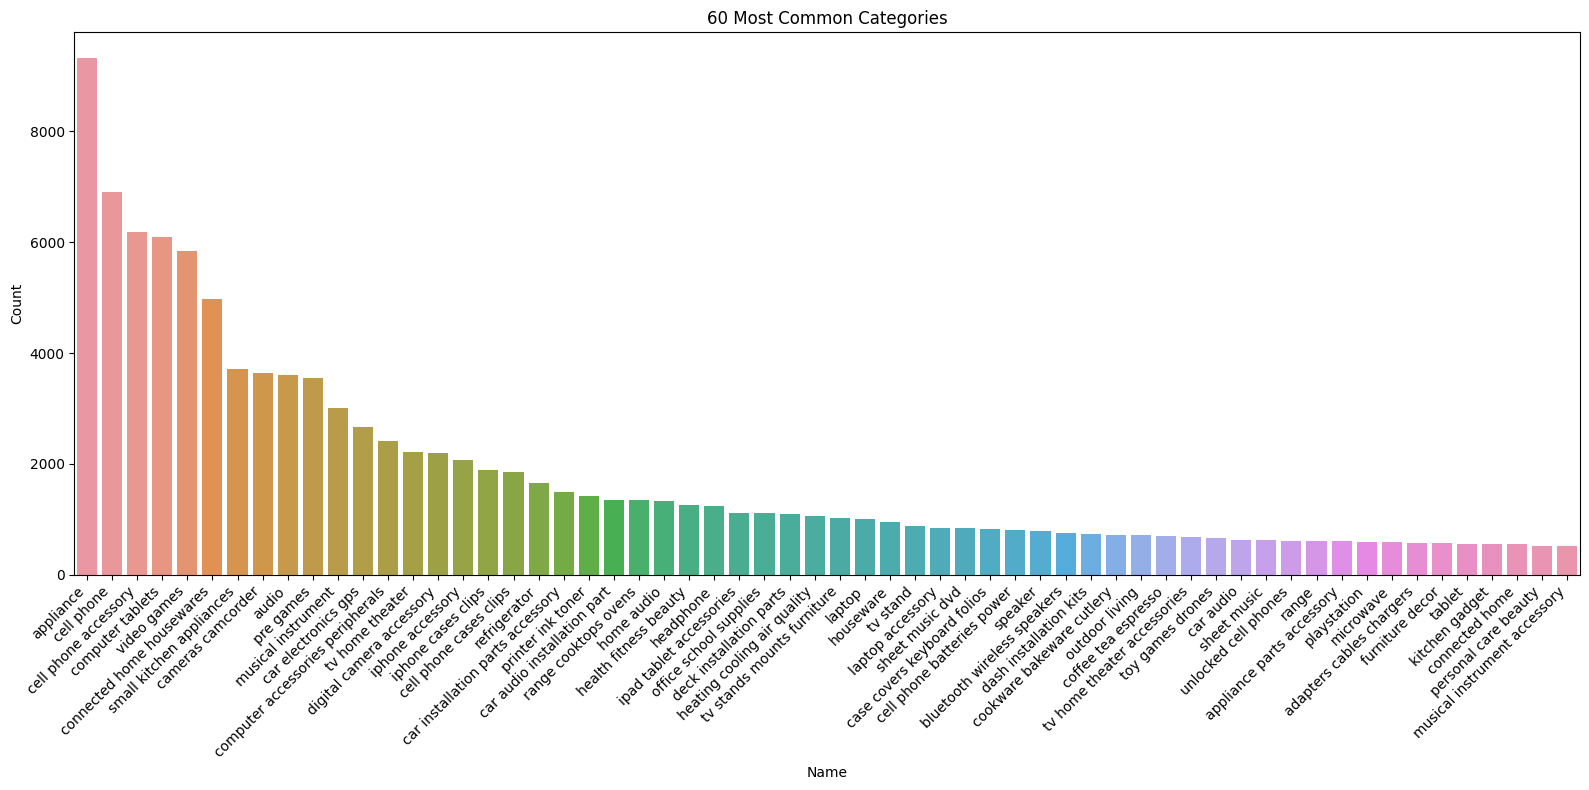

In [129]:
# We dedice to plot the 60 most common categories in the dataset.
cant_var = 60
categorias_df_plot = categorias_df_conteo[0:cant_var].copy()
title=f'{cant_var} Most Common Categories'
plt.figure(figsize=(16,8))
sns.barplot(data=categorias_df_plot, x='Name', y='Count')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [130]:
len(categorias_df_conteo[categorias_df_conteo['Count']<=100])
# There are 1534 categories that have been used less than 100 times.

1482

In [131]:
len(categorias_df_conteo[categorias_df_conteo['Count']<=1000])
# There are 1772 categories that have been used less than 1000 times.

1707

### We group all categories that have less than 100 occurrences into a single category called "others"

In [132]:
cat_others_count = categorias_df_conteo[categorias_df_conteo['Count'] <= 100].copy()
cat_others_count.reset_index(inplace=True, drop=True)
cat_others_count


,Name,Count
0,dj lighting effects,99
1,handheld stick vacuums,98
2,table portable fans,98
3,activity tracker accessories,97
4,geek squad,96
...,...,...
1477,mm videotape,1
1478,mobile broadband,1
1479,mobile broadband devices plan,1
1480,model kits,1


In [134]:
# We change the name of those categories that have less than 100 observations to 'others'
categorias_df_conteo.loc[categorias_df_conteo['Count'] <= 100, 'Name'] = 'others'
categorias_df_conteo = categorias_df_conteo.groupby(['Name']).sum()
categorias_df_conteo.sort_values('Count', ascending=False, inplace=True)
categorias_df_conteo.reset_index(inplace=True)
categorias_df_conteo

,Name,Count
0,others,28019
1,appliance,9317
2,cell phone,6905
3,cell phone accessory,6176
4,computer tablets,6088
...,...,...
253,prime lense,104
254,antennas adapters,103
255,monitor screen accessory,102
256,car charger,102


In [135]:
len(categorias_df_conteo[categorias_df_conteo['Count']<=1000])
# Now there are 225 categories that have been used less than 1000 times.

225

## We will use clustering to combine the categories with few frequencies, those 225 previously calculated.
* Filter categories infrequently.
* Vectorize the names of these categories.
* Use some clustering algorithm to see how they are combined.

### Filter categories infrequently.

In [136]:
cont_min = 1000 # Minimum number of counts that these categories cannot independently exceed.
categorias_pequeñas = categorias_df_conteo[categorias_df_conteo['Count'] < cont_min]
categorias_pequeñas.head()

,Name,Count
33,houseware,954
34,tv stand,886
35,laptop accessory,845
36,sheet music dvd,842
37,case covers keyboard folios,821


In [138]:
# Verify calculation
len(categorias_pequeñas)

225

### Vectorize the names of these categories.rizar los nombres de estas categorías.

In [140]:
# We import a pre-trained w2v model
import gensim.downloader
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [141]:
pretrained_w2v_model = gensim.downloader.load('glove-wiki-gigaword-300')

In [142]:
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.util import ngrams

def generate_ngrams(tokens, n):
    '''Creates ngrams groups of n tokens together'''
    if n == 1:
        return tokens
    else:
        return [' '.join(ngram) for ngram in ngrams(tokens, n)]

def toktok(oraciones, ninit=1, nfin=1):
    '''
    oraciones: List of sentences to tokenize.
    ninit: Minimun amount of ngrams to get from tokens.
    nfin: Maximun amount of ngrams to get from tokens.
    '''
    tokenizer = ToktokTokenizer()

    oraciones_tokenizadas_ngramas = []
    
    for oracion in oraciones:
        ngram_tokens = [generate_ngrams(tokenizer.tokenize(oracion), n) for n in range(ninit, nfin+1)]
        ngram_tokens_flattened = [token for ngram in ngram_tokens for token in ngram]
        oraciones_tokenizadas_ngramas.append(ngram_tokens_flattened)
        

    return oraciones_tokenizadas_ngramas

In [144]:
# We tokenize categories.
cat_peq_tokenized = toktok(categorias_pequeñas['Name'], 1, 1)
cat_peq_tokenized[0:8]

[['houseware'],
 ['tv', 'stand'],
 ['laptop', 'accessory'],
 ['sheet', 'music', 'dvd'],
 ['case', 'covers', 'keyboard', 'folios'],
 ['cell', 'phone', 'batteries', 'power'],
 ['speaker'],
 ['bluetooth', 'wireless', 'speakers']]

In [145]:
def vectorizer_pretrained(corpus, model, num_features: int=100):
    '''
    Receives the description tokenised, it converts each tocken to a vector.
    Then creates a mean vector of all the vectors that represents each token.
    The result vector is returned.
    The default dimensionality of the vector is 100 but it can be changed.
    '''
    corpus_size = len(corpus)
    corpus_vectors = np.zeros((corpus_size, num_features), dtype=np.float32)

    for i, document in enumerate(corpus):
        word_count = 0
        doc_vector = np.zeros(num_features, dtype=np.float32)

        for word in document:
            if word in model:
                doc_vector += model.word_vec(word)
                word_count+=1
        
        if word_count > 0:
            doc_vector /= word_count
        
        corpus_vectors[i] = doc_vector
    
    return corpus_vectors

In [146]:
# We vectorize each categorie with the pretrained word2vec model.
# We use the 300-dimensional word2vec model.

import pandas as pd
cat_peq_vectorized = vectorizer_pretrained(cat_peq_tokenized, pretrained_w2v_model, 300)
cat_peq_vectorized[0:8]

C:\Users\pct3x\AppData\Local\Temp\ipykernel_9340\4183870425.py:11: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vector += model.word_vec(word)


array([[ 0.68769   , -0.22314   , -0.15545   , ..., -0.12149   ,
         0.72531   ,  0.075321  ],
       [ 0.090469  ,  0.35853   , -0.006915  , ...,  0.12438499,
        -0.049498  ,  0.18533501],
       [-0.217705  ,  0.35582948, -0.32893002, ...,  0.548065  ,
         0.16656   , -0.233375  ],
       ...,
       [-0.21081498,  0.016378  , -0.23963498, ..., -0.25109175,
        -0.165465  ,  0.08973365],
       [-0.094479  , -0.31517   ,  0.21301   , ..., -0.14889   ,
        -0.23396   ,  0.47062   ],
       [-0.41698733, -0.17429368,  0.02408666, ...,  0.36750665,
         0.14653666, -0.21439   ]], dtype=float32)

In [147]:
len(cat_peq_vectorized)

225

### We try KMeans as a clustering algorithm to see how they are combined.

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


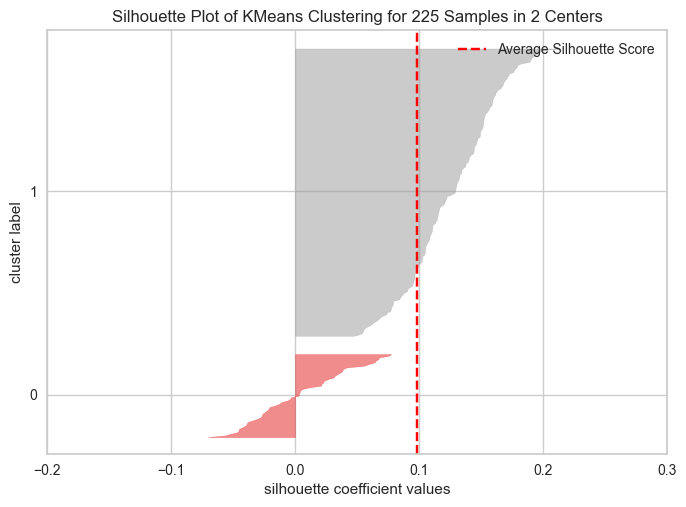

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


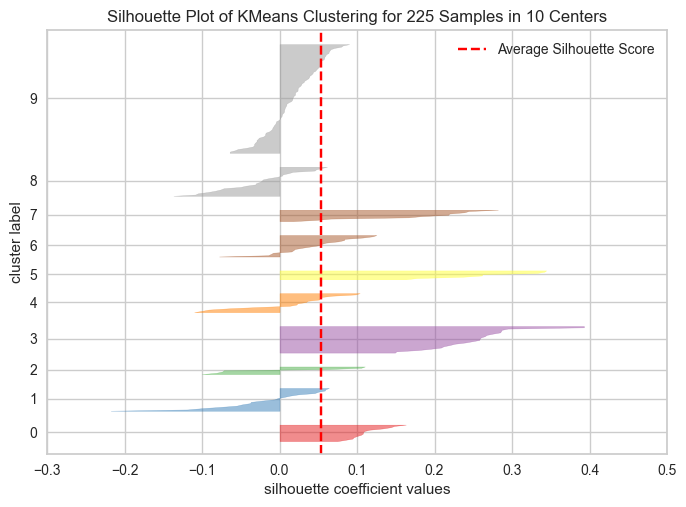

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


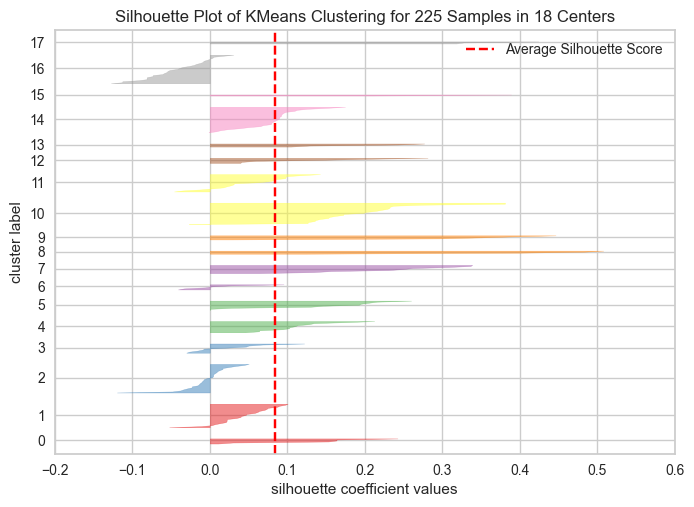

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


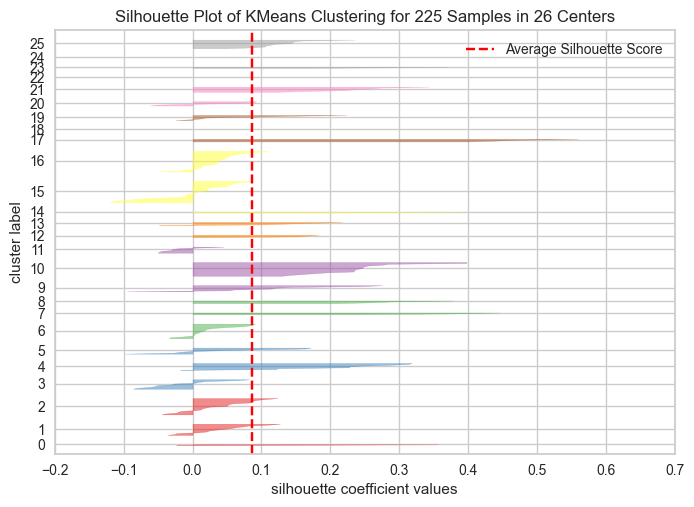

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


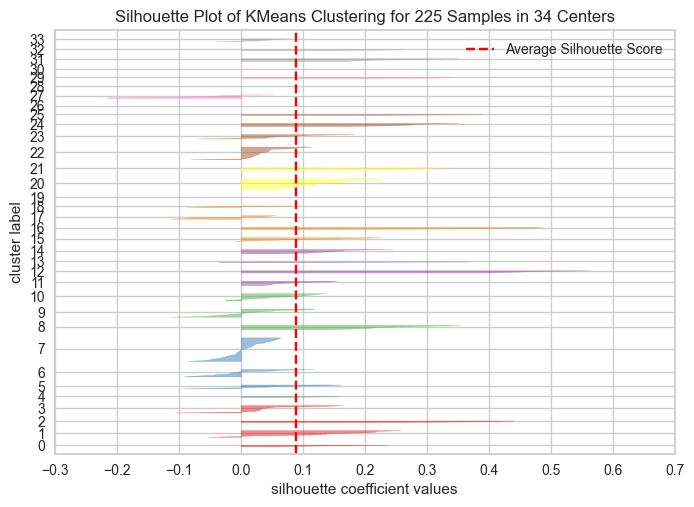

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


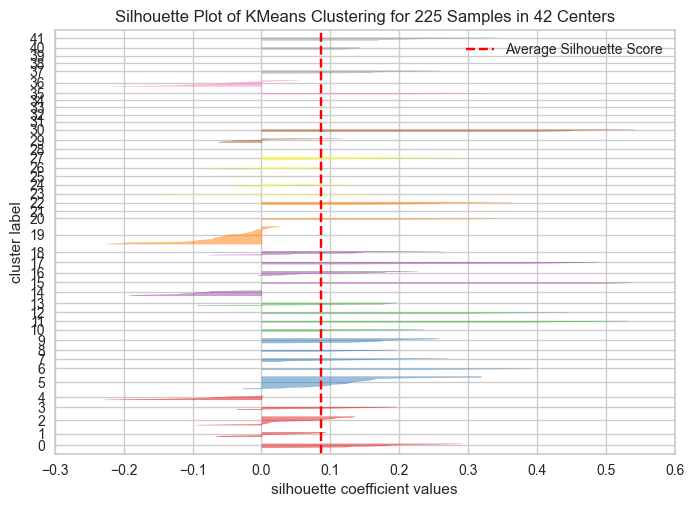

In [148]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2, 50, 8):

    # Initialize the KMeans model and viewer
    km = KMeans(n_clusters=i)
    visualizer = SilhouetteVisualizer(km)

    # Fit the display with the data
    visualizer.fit(cat_peq_vectorized)

    # Show the graph
    visualizer.show()

Clearly, if the Silhouette Score doesn't improve by already 50 clusters, this is not the way to go.

## We will train our Word2Vec considering that each product has several categories and therefore they have a certain relationship or closeness.
We will consider for each product that its list of categories is a sentence and that each category is a word and we will build a closest word suggestion model, that is, categories that are closest.
* Output a dataframe with Skus and Category columns with the list of categories for each sku.
* Normalize each category.
* Train the Word2Vec model.
* Check recommendations.

### Output a dataframe with Skus and Category columns with the list of categories for each sku.

In [150]:
products_categories_df.head()

,Skus,Category
0,43900,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [151]:
products_descri_df = products_df.drop(['Name', 'Category', 'Image'], axis=1)
products_name_df = products_df.drop(['Descriptions', 'Category', 'Image'], axis=1)
products_categories_df = products_df.drop(['Name', 'Descriptions', 'Image'], axis=1)
products_images_df = products_df.drop(['Name', 'Descriptions', 'Category'], axis=1)

In [152]:
len(products_categories_df)

51645

In [153]:
products_categories_df.head()

,Skus,Category
0,43900,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [154]:
lista_cat = []
lista_cat2 = []
for diccionarios in products_categories_df['Category']:
    lista_cat = [dic['name'] for dic in diccionarios]
    lista_cat2.append(lista_cat)

In [155]:
lista_cat2[0:3]

[['Connected Home & Housewares',
  'Housewares',
  'Household Batteries',
  'Alkaline Batteries'],
 ['Connected Home & Housewares',
  'Housewares',
  'Household Batteries',
  'Alkaline Batteries'],
 ['Connected Home & Housewares',
  'Housewares',
  'Household Batteries',
  'Alkaline Batteries']]

In [156]:
products_categories_df['Category'] = lista_cat2
products_categories_df.head()

,Skus,Category
0,43900,"[Connected Home & Housewares, Housewares, Hous..."
1,48530,"[Connected Home & Housewares, Housewares, Hous..."
2,127687,"[Connected Home & Housewares, Housewares, Hous..."
3,150115,"[Connected Home & Housewares, Housewares, Hous..."
4,185230,"[Connected Home & Housewares, Housewares, Hous..."


### Normalizar cada categoría.

In [157]:
def normalizador(lista):
    normalizado = text_normalizer.normalize_corpus(lista, stopwords=stop_words, text_lemmatization=True)
    return normalizado

In [160]:
products_categories_df['Category'] = products_categories_df['Category'].apply(normalizador)
products_categories_df.head()

,Skus,Category
0,43900,"[connected home housewares, houseware, househo..."
1,48530,"[connected home housewares, houseware, househo..."
2,127687,"[connected home housewares, houseware, househo..."
3,150115,"[connected home housewares, houseware, househo..."
4,185230,"[connected home housewares, houseware, househo..."


In [ ]:
products_categories_df.to_csv('dataset/categories_normalized.csv', index=False)

In [159]:
import ast
products_categories_df = pd.read_csv('dataset/categories_normalized.csv')
products_categories_df['Category'] = products_categories_df['Category'].apply(ast.literal_eval)
products_categories_df.head()

,Skus,Category
0,43900,"[connected home housewares, houseware, househo..."
1,48530,"[connected home housewares, houseware, househo..."
2,127687,"[connected home housewares, houseware, househo..."
3,150115,"[connected home housewares, houseware, househo..."
4,185230,"[connected home housewares, houseware, househo..."


In [161]:
categorias_df_conteo.sort_index(inplace=True)
categorias_df_conteo.head()

,Name,Count
0,others,28019
1,appliance,9317
2,cell phone,6905
3,cell phone accessory,6176
4,computer tablets,6088


### Entrenar el modelo Word2Vec.

In [162]:
from gensim.models import Word2Vec

In [163]:
products_categories_df.head()

,Skus,Category
0,43900,"[connected home housewares, houseware, househo..."
1,48530,"[connected home housewares, houseware, househo..."
2,127687,"[connected home housewares, houseware, househo..."
3,150115,"[connected home housewares, houseware, househo..."
4,185230,"[connected home housewares, houseware, househo..."


In [164]:
cat_others_count.head()

,Name,Count
0,dj lighting effects,99
1,handheld stick vacuums,98
2,table portable fans,98
3,activity tracker accessories,97
4,geek squad,96


In [165]:
categorias_others = [[aux if aux not in cat_others_count['Name'].values else 'others' for aux in lista] for lista in products_categories_df['Category']]
categorias_others[0:10]

[['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['car electronics gps',
  'car installation parts accessory',
  'car audio installation part',
  'deck installation parts',
  'dash installation kits']]

In [166]:
products_categories_df['Category'][0:10].values

array([list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['carfi instore']),
       list(['connected home housewares', 'houseware', 'household battery', 'specialty battery']),
       list(['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'dash installation kits'])],
      dtype=object)

In [167]:
len(categorias_others)

51645

In [169]:
model = Word2Vec(categorias_others, vector_size=32, window=10, min_count=1, workers=4, epochs=100000)

'model = Word2Vec(categorias_others, vector_size=32, window=10, min_count=1, workers=4, epochs=100000)'

In [170]:
ruta_modelo = 'modelos/modelo_w2v.model'

In [205]:
model.save(ruta_modelo)

In [171]:
model = Word2Vec.load(ruta_modelo)
model.wv.key_to_index

{'others': 0,
 'appliance': 1,
 'cell phone': 2,
 'cell phone accessory': 3,
 'computer tablets': 4,
 'video games': 5,
 'connected home housewares': 6,
 'small kitchen appliances': 7,
 'cameras camcorder': 8,
 'audio': 9,
 'pre games': 10,
 'musical instrument': 11,
 'car electronics gps': 12,
 'computer accessories peripherals': 13,
 'tv home theater': 14,
 'digital camera accessory': 15,
 'iphone accessory': 16,
 'iphone cases clips': 17,
 'cell phone cases clips': 18,
 'refrigerator': 19,
 'car installation parts accessory': 20,
 'printer ink toner': 21,
 'car audio installation part': 22,
 'range cooktops ovens': 23,
 'home audio': 24,
 'health fitness beauty': 25,
 'headphone': 26,
 'ipad tablet accessories': 27,
 'office school supplies': 28,
 'deck installation parts': 29,
 'heating cooling air quality': 30,
 'tv stands mounts furniture': 31,
 'laptop': 32,
 'houseware': 33,
 'tv stand': 34,
 'laptop accessory': 35,
 'sheet music dvd': 36,
 'case covers keyboard folios': 37,
 '

### Check recommendations

In [186]:
cat_query = 'car audio installation part'
most_similar = model.wv.most_similar(positive=cat_query)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,car accessory,0.718153
1,car speakers,0.572156
2,dash installation kits,0.455363
3,car subwoofers enclosures,0.428683
4,car audio,0.427814
5,car amplifiers,0.418353
6,deck harnesses,0.416776
7,microphone live sound,0.410919
8,antennas adapters,0.407896
9,car stereo receivers,0.400777


In [187]:
elemento_buscado = cat_query
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'dash installation kits'], ['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'dash installation kits'], ['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'deck harnesses'], ['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'deck harnesses'], ['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'deck harnesses'], ['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'antennas adapters'], ['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'dash installation kits'], ['car electro

In [188]:
elemento_buscado = 'car accessory'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car installation parts accessory', 'car accessory'], ['car electronics gps', 'car gp accessory', 'car accessory', 'c

We have verified that 'car audio installation part' and 'car accessory' are always surrounded by the same categories.

In [189]:
cat_query = 'microwave'
most_similar = model.wv.most_similar(positive= cat_query)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,air purifier,0.923773
1,humidifier,0.921679
2,heater,0.918628
3,dishwasher,0.914020
4,cooktop,0.895479
5,build dishwasher,0.865043
6,refrigerator,0.863562
7,freezers ice makers,0.858385
8,single ovens,0.851599
9,vacuum cleaners floor care,0.841706


In [190]:
elemento_buscado = cat_query
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', 'microwave', 'microwave'], ['appliance', '

In [191]:
elemento_buscado = 'cooktop'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'], ['appliance', 'range cooktops ovens', 'cooktop'],

The same is also true between 'microwave' and 'cooktop'. Both are generally surrounded by the same categories.

The model so far has excellent recommendations. Now let's try categories with few occurrences.

### Check recommendations of a category with few appearances. (Less than 1000)

In [172]:
categorias_pequeñas.head()

,Name,Count
33,houseware,954
34,tv stand,886
35,laptop accessory,845
36,sheet music dvd,842
37,case covers keyboard folios,821


In [193]:
cat_bajo_cont = 'laptop accessory'
most_similar = model.wv.most_similar(positive=cat_bajo_cont)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,surge protectors power,0.948234
1,monitor screen accessory,0.943351
2,usb flash drive,0.939785
3,hard drives storage,0.929027
4,mice keyboards,0.874999
5,computer keyboards,0.862080
6,mouse,0.861837
7,cables connectors,0.856630
8,external hard drive,0.832813
9,usb cables hubs,0.801097


In [194]:
elemento_buscado = 'laptop accessory'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop chargers adapters'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop chargers adapters'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop battery'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop battery'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop battery'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop battery'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop battery'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop chargers adapters'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'lap desks'], ['computer tablets', 'computer accessories peripherals', 'laptop accessory', 'laptop chargers adapters'], ['co

In [195]:
elemento_buscado = 'usb flash drive'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive'], ['computer tablets', 'computer accessories peripherals', 'usb flash drive']

We have verified that 'laptop accessory' and 'usb flash drive' are generally surrounded by the same categories.

In [196]:
categorias_pequeñas.tail()

,Name,Count
253,prime lense,104
254,antennas adapters,103
255,monitor screen accessory,102
256,car charger,102
257,mirrorless lense,102


In [197]:
cat_bajo_cont = 'mirrorless lense'
most_similar = model.wv.most_similar(positive=cat_bajo_cont)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,dslr lense,0.864462
1,tripods monopods,0.759615
2,camera batteries power,0.742405
3,prime lense,0.738457
4,camera bags cases straps,0.728982
5,universal camera bags case,0.713157
6,camera battery,0.696121
7,binocular,0.662324
8,flash lighting studio,0.660034
9,point shoot cameras,0.625773


In [198]:
elemento_buscado = 'mirrorless lense'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'mirrorless lense'], ['cameras camcorder', 'digital camera acce

In [199]:
elemento_buscado = 'dslr lense'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'prime lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'long range zoom lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'long range zoom lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'short range zoom lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'short range zoom lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'short range zoom lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'prime lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'prime lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr lense', 'long range zoom lense'], ['cameras camcorder', 'digital camera accessory', 'camera lense', 'dslr 

We have verified that 'mirrorless lense' and 'dslr lense' are generally surrounded by the same categories.
We can conclude that this word2vec model is good.

## Use the Word2Vec model to combine categories with less than 250 occurrences into a category that represents it as correctly as possible.

In [173]:
categorias_df_conteo

,Name,Count
0,others,28019
1,appliance,9317
2,cell phone,6905
3,cell phone accessory,6176
4,computer tablets,6088
...,...,...
253,prime lense,104
254,antennas adapters,103
255,monitor screen accessory,102
256,car charger,102


In [174]:
categorias_pequeñas = categorias_df_conteo[categorias_df_conteo['Count']<=250]
categorias_pequeñas

,Name,Count
123,camera bags case,250
124,dryer,249
125,toy life,247
126,fan,244
127,xbox,244
...,...,...
253,prime lense,104
254,antennas adapters,103
255,monitor screen accessory,102
256,car charger,102


In [175]:
258-135

123

In [176]:
# We create a dataframe to see the original category and the new category to be assigned.
lista_cat = []
lista_cat_orig = []
for cat_cont in categorias_df_conteo['Name']:
    lista_cat_orig.append(cat_cont)
    if cat_cont not in categorias_pequeñas['Name'].values:
        lista_cat.append(cat_cont)
    else:
        most_similar = model.wv.most_similar(positive=cat_cont)
        # We check if most_similar is among the categories that have few occurrences and if so, we go to the next representation value.
        bandera = False
        for i in range(10):
            if most_similar[i][0] not in categorias_pequeñas['Name'].values:
                lista_cat.append(most_similar[i][0])
                bandera = True
                break
        if bandera == False:
            lista_cat.append(cat_cont)

categorias_combinadas_conteo = categorias_df_conteo.copy()
categorias_combinadas_conteo['Name Orig'] = lista_cat_orig
categorias_combinadas_conteo['Name'] = lista_cat
categorias_combinadas_conteo


,Name,Count,Name Orig
0,others,28019,others
1,appliance,9317,appliance
2,cell phone,6905,cell phone
3,cell phone accessory,6176,cell phone accessory
4,computer tablets,6088,computer tablets
...,...,...,...
253,wearable technology,104,prime lense
254,dash installation kits,103,antennas adapters
255,hard drives storage,102,monitor screen accessory
256,cell phone cases clips,102,car charger


In [177]:
categorias_df_conteo[categorias_df_conteo['Name'] == 'mirrorless lense']
# We had only 102 examples of 'mirrorless lens'

,Name,Count
257,mirrorless lense,102


In [207]:
categorias_df_conteo[categorias_df_conteo['Name'] == 'dslr lense']
# We had 277 examples of 'dslr lense'.

,Name,Count
111,dslr lense,277


In [178]:
categorias_combinadas_conteo[categorias_combinadas_conteo['Name'] == 'dslr lense']
# It is verified that those categories that had less than 250 examples have been replaced with their best representation that has more than 250 examples.
# This dataframe we will use to replace the categories that we must train.

,Name,Count,Name Orig
111,dslr lense,277,dslr lense
257,dslr lense,102,mirrorless lense


In [179]:
categorias_unicas = categorias_combinadas_conteo['Name'].unique()
categorias_unicas = pd.DataFrame(categorias_unicas, columns=['Name'])
categorias_unicas

,Name
0,others
1,appliance
2,cell phone
3,cell phone accessory
4,computer tablets
...,...
118,laptop battery
119,household essential
120,iphone case
121,cooktop


### We must replace the previous category with the new one in the list that we will use to train.

In [180]:
categorias_others[0:10]

[['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['car electronics gps',
  'car installation parts accessory',
  'car audio installation part',
  'deck installation parts',
  'dash installation kits']]

In [181]:
# List to store the modified results
categorias_others_modificado = []

# Loop through each list in categories_others
for lista in categorias_others:
    # List to store the modified elements of the current list
    lista_modificada = []
    
    for nombre1 in lista:
        # Match the 'Name Orig' column of the DataFrame
        coincidencia = categorias_combinadas_conteo[categorias_combinadas_conteo['Name Orig'] == nombre1]
        if not coincidencia.empty:
            # If a match was found, add the corresponding value from the 'Name' column
            nombre_reemplazo = coincidencia.iloc[0]['Name']
            lista_modificada.append(nombre_reemplazo)
        else:
            # If no match found, keep original name1
            lista_modificada.append(nombre1)
    
    # Add the modified list to the result list
    categorias_others_modificado.append(lista_modificada)


In [182]:
categorias_others_modificado[0:10]

[['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['others'],
 ['connected home housewares',
  'houseware',
  'telephones communication',
  'others'],
 ['car electronics gps',
  'car installation parts accessory',
  'car audio installation part',
  'deck installation parts',
  'dash installation kits']]

In [183]:
categorias_others[0:10]

[['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['car electronics gps',
  'car installation parts accessory',
  'car audio installation part',
  'deck installation parts',
  'dash installation kits']]

In [184]:
most_similar = model.wv.most_similar(positive='household battery')
most_similar = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar

,Category,Score
0,grill,0.784284
1,telephones communication,0.772909
2,office furniture storage,0.751988
3,outdoor living,0.745079
4,household essential,0.734242
5,patio furniture decor,0.725026
6,outdoor heating,0.715823
7,telephone accessory,0.680769
8,wall art,0.648471
9,furniture decor,0.646878


In [185]:
len(categorias_others_modificado)

51645

## We create our "y" for training

In [186]:
categorias_unicas.head()

,Name
0,others
1,appliance
2,cell phone
3,cell phone accessory
4,computer tablets


In [187]:

y = pd.DataFrame(columns=categorias_unicas['Name'].values)
y

,others,appliance,cell phone,cell phone accessory,computer tablets,video games,connected home housewares,small kitchen appliances,cameras camcorder,audio,...,nintendo ds games,case,tv,security cameras surveillance,build dishwasher,laptop battery,household essential,iphone case,cooktop,coffee maker


In [190]:
# Create an empty DataFrame with the same categories as unique_categories and fill it with zeros
y = pd.DataFrame(columns=categorias_unicas['Name'].values)

# Loop through each list in categories_others_modified
for lista in categorias_others_modificado:
    cat_bool_acum = [0]*len(categorias_unicas)
    for cat in lista:
        cat_bool = categorias_unicas['Name'].values == cat
        cat_bool_acum += cat_bool
    
    nueva_fila = pd.DataFrame([cat_bool_acum], columns=y.columns)

    # Add the new row to the end of DataFrame 'y'
    y = pd.concat([y, nueva_fila], ignore_index=False)
    
# Display the result
y.reset_index(inplace=True, drop=True)
y

,others,appliance,cell phone,cell phone accessory,computer tablets,video games,connected home housewares,small kitchen appliances,cameras camcorder,audio,...,nintendo ds games,case,tv,security cameras surveillance,build dishwasher,laptop battery,household essential,iphone case,cooktop,coffee maker
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
51641,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51642,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51643,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
# Some of the categories were added twice or more times so we need to change them to just 1.
def reasignar_valor(valor):
    if valor == 0:
        return 0
    else:
        return 1

In [192]:
y = y.applymap(reasignar_valor)
y

,others,appliance,cell phone,cell phone accessory,computer tablets,video games,connected home housewares,small kitchen appliances,cameras camcorder,audio,...,nintendo ds games,case,tv,security cameras surveillance,build dishwasher,laptop battery,household essential,iphone case,cooktop,coffee maker
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
51641,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51642,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51643,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# Since calculating y takes time, we will save the results in a csv file named categorias_buleanas.csv in the dataset folder.
directorio = 'dataset/categorias_buleanas.csv'

In [271]:
y.to_csv(directorio, index=False)

In [194]:
y = pd.read_csv(directorio)
y

,others,appliance,cell phone,cell phone accessory,computer tablets,video games,connected home housewares,small kitchen appliances,cameras camcorder,audio,...,nintendo ds games,case,tv,security cameras surveillance,build dishwasher,laptop battery,household essential,iphone case,cooktop,coffee maker
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
51641,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51642,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51643,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## We use the tokenization and vectorization functions to create X

In [195]:
products_descri_df = products_descri_df[['Skus', 'Descriptions']]
products_descri_df

,Skus,Descriptions
0,43900,Compatible with select electronic devices; AAA...
1,48530,Long-lasting energy; DURALOCK Power Preserve t...
2,127687,Compatible with select electronic devices; AA ...
3,150115,4-pack AA alkaline batteries; battery tester i...
4,185230,Compatible with select electronic devices; C s...
...,...,...
51641,9995663,Compatible with select Honeywell air purifier ...
51642,9996238,Removes dirt and grime from hard floors; cloth...
51643,9996826,"1 x Total Bay - 1 x 2.5"" Bay"
51644,9999119,"Streams 1080p content; dual-band, dual-antenna..."


In [196]:
descri_tokenized = toktok(products_descri_df['Descriptions'], 1, 1)
descri_tokenized[0:8]

[['Compatible',
  'with',
  'select',
  'electronic',
  'devices',
  ';',
  'AAA',
  'size',
  ';',
  'DURALOCK',
  'Power',
  'Preserve',
  'technology',
  ';',
  '4-pack'],
 ['Long-lasting',
  'energy',
  ';',
  'DURALOCK',
  'Power',
  'Preserve',
  'technology',
  ';',
  'for',
  'toys',
  ',',
  'clocks',
  ',',
  'radios',
  ',',
  'games',
  ',',
  'remotes',
  ',',
  'PDAs',
  'and',
  'more'],
 ['Compatible',
  'with',
  'select',
  'electronic',
  'devices',
  ';',
  'AA',
  'size',
  ';',
  'DURALOCK',
  'Power',
  'Preserve',
  'technology',
  ';',
  '8-pack'],
 ['4-pack',
  'AA',
  'alkaline',
  'batteries',
  ';',
  'battery',
  'tester',
  'included'],
 ['Compatible',
  'with',
  'select',
  'electronic',
  'devices',
  ';',
  'C',
  'size',
  ';',
  'DURALOCK',
  'Power',
  'Preserve',
  'technology',
  ';',
  '4-pack'],
 ['Compatible',
  'with',
  'select',
  'electronic',
  'devices',
  ';',
  'D',
  'size',
  ';',
  'DURALOCK',
  'Power',
  'Preserve',
  'technology'

In [197]:
descri_vectorized = vectorizer_pretrained(descri_tokenized, pretrained_w2v_model, 300)
descri_vectorized[0:8]

C:\Users\pct3x\AppData\Local\Temp\ipykernel_9340\4183870425.py:11: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vector += model.word_vec(word)


array([[-0.22836423, -0.06347489,  0.02381777, ..., -0.17394936,
         0.06079619,  0.01960111],
       [-0.05624026, -0.08761742, -0.02857189, ..., -0.23973002,
         0.02472722,  0.07853571],
       [-0.22836423, -0.06347489,  0.02381777, ..., -0.17394936,
         0.06079619,  0.01960111],
       ...,
       [-0.22836423, -0.06347489,  0.02381777, ..., -0.17394936,
         0.06079619,  0.01960111],
       [-0.2401331 , -0.05329565, -0.02616834, ..., -0.1919884 ,
         0.02380281,  0.08413199],
       [-0.2104352 ,  0.03799614, -0.02966505, ..., -0.02764641,
         0.04331494,  0.00887596]], dtype=float32)

In [198]:
len(descri_vectorized)

51645

# Training with Random Forest and MultiOutputClassifier

## Definition of parameters

In [199]:
X = descri_vectorized
X

array([[-0.22836423, -0.06347489,  0.02381777, ..., -0.17394936,
         0.06079619,  0.01960111],
       [-0.05624026, -0.08761742, -0.02857189, ..., -0.23973002,
         0.02472722,  0.07853571],
       [-0.22836423, -0.06347489,  0.02381777, ..., -0.17394936,
         0.06079619,  0.01960111],
       ...,
       [-0.17479457,  0.03314086,  0.18114315, ..., -0.35067028,
         0.184257  ,  0.26893714],
       [-0.24413833, -0.04732635,  0.00219169, ..., -0.10470361,
        -0.0036281 ,  0.04680122],
       [-0.0079552 , -0.0624998 , -0.01460381, ...,  0.03336389,
        -0.10072111,  0.1710462 ]], dtype=float32)

In [200]:
X.shape

(51645, 300)

In [201]:
y.values

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [202]:
# We divide the training, testing and validation data with proportions
#70, 15, 15 respectively
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

y_array = y.values

X_train, X_rest, y_train, y_rest = train_test_split(X, y_array, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

print((len(X_train),len(y_train)))
print((len(X_test),len(y_test)))
print((len(X_val),len(y_val)))


(36151, 36151)
(7747, 7747)
(7747, 7747)


In [203]:
num_classes = y_train.shape[1]
num_rounds = 1

LightGBM no es la opción correcta ya que este modelo se entrena considerando una sola categoria correcta por vez, y en nuestro caso tenemos varias categorias por producto.

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'estimator__n_estimators': [100, 200],          # Number of trees in the forest
    'estimator__max_depth': [None],                 # Max depth of trees
    'estimator__max_features': [4, 8],              # Maximum number of features to consider in each split
    'estimator__min_samples_leaf': [2, 4],          # Minimum number of samples required on each leaf
    'estimator__min_samples_split': [6, 8],         # Minimum number of samples required to split a node
    'estimator__bootstrap': [True],                 # Whether to use bootstrap to build the trees
}

# Create the base classifier (RandomForestClassifier) ​​with the custom hyperparameters
base_classifier = RandomForestClassifier(random_state=42)

# Create classifier MultiOutputClassifier with RandomForestClassifier as base classifier
multi_label_classifier = MultiOutputClassifier(base_classifier)

# Create the RandomizedSearchCV object to perform the hyperparameter search
random_search = RandomizedSearchCV(estimator=multi_label_classifier, param_distributions=param_dist,
                                 n_iter=5, cv=5, random_state=42, verbose=4, n_jobs=-1,
                                 scoring='roc_auc')

# Perform hyperparameter search
random_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = random_search.best_params_
best_params

{'estimator__n_estimators': 200,
 'estimator__min_samples_split': 6,
 'estimator__min_samples_leaf': 4,
 'estimator__max_features': 4,
 'estimator__max_depth': None,
 'estimator__bootstrap': True}

In [213]:
y_test_pred_proba = random_search.predict_proba(X_test[0:5])

In [ ]:
y_test_pred = random_search.predict(X_test)

In [377]:
y_test[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [380]:
y_test_pred[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [381]:
y_test_pred_proba[0]

array([[0.85890867, 0.14109133],
       [0.57893976, 0.42106024],
       [0.71825666, 0.28174334],
       ...,
       [0.65386738, 0.34613262],
       [0.89759647, 0.10240353],
       [0.48582982, 0.51417018]])

In [385]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names=y.columns))

                                  precision    recall  f1-score   support

                          others       0.84      0.79      0.81      3085
                       appliance       0.97      0.81      0.88      1404
                      cell phone       0.98      0.79      0.87      1023
            cell phone accessory       0.98      0.77      0.86       921
                computer tablets       0.97      0.55      0.70       910
                     video games       0.96      0.91      0.94       887
       connected home housewares       0.99      0.53      0.69       718
        small kitchen appliances       0.99      0.58      0.73       555
               cameras camcorder       0.98      0.59      0.74       555
                           audio       0.97      0.49      0.65       518
                       pre games       0.76      0.69      0.72       632
              musical instrument       0.99      0.42      0.59       448
             car electronics gps     

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### We save the model.

In [204]:
filepath = 'modelos/best_moc.pkl'

In [205]:
import pickle

In [394]:
with open(filepath, 'wb') as file:
    pickle.dump(random_search, file)

In [206]:
with open(filepath, 'rb') as file:
    model_moc_pkl = pickle.load(file)

In [243]:
y_pred_test_loaded = model_moc_pkl.predict(X_test)

'y_pred_test_loaded = model_moc_pkl.predict(X_test)'

In [ ]:
clas_report_mat = classification_report(y_test, y_pred_test_loaded, target_names=y.columns)
print(clas_report_mat)

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                          others       0.84      0.79      0.81      3085
                       appliance       0.97      0.81      0.88      1404
                      cell phone       0.98      0.79      0.87      1023
            cell phone accessory       0.98      0.77      0.86       921
                computer tablets       0.97      0.55      0.70       910
                     video games       0.96      0.91      0.94       887
       connected home housewares       0.99      0.53      0.69       718
        small kitchen appliances       0.99      0.58      0.73       555
               cameras camcorder       0.98      0.59      0.74       555
                           audio       0.97      0.49      0.65       518
                       pre games       0.76      0.69      0.72       632
              musical instrument       0.99      0.42      0.59       448
             car electronics gps     

In [405]:
report_dict = classification_report(y_test, y_pred_test_loaded, target_names=y.columns, output_dict=True)

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(report_dict).transpose()

# Save the DataFrame in a CSV file
metrics_df.to_csv('dataset/reporte_descripciones_df.csv')

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Now we'll do the same for the names.
### We use the tokenization and vectorization functions to create X_names

In [214]:
products_name_df

,Skus,Name
0,43900,Duracell - AAA Batteries (4-Pack)
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack)
2,127687,Duracell - AA Batteries (8-Pack)
3,150115,Energizer - MAX Batteries AA (4-Pack)
4,185230,Duracell - C Batteries (4-Pack)
...,...,...
51641,9995663,Honeywell - True HEPA Replacement Filters for ...
51642,9996238,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...
51643,9996826,Aleratec - Drive Enclosure - Internal - Black
51644,9999119,Amazon - Fire TV Stick


In [216]:
# We need to normalize, tokenize and vectorize the data.
products_name_df['Name Normalized'] = text_normalizer.normalize_corpus(products_name_df['Name'], stopwords=stop_words, text_lemmatization=True)
products_name_df['Name Tokenized'] = toktok(products_name_df['Name Normalized'], 1, 1)

In [410]:
products_name_vectorized = vectorizer_pretrained(products_name_df['Name Tokenized'], pretrained_w2v_model, 300)

C:\Users\pct3x\AppData\Local\Temp\ipykernel_13532\4183870425.py:11: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vector += model.word_vec(word)


In [413]:
products_name_df

,Skus,Name,Name Normalized,Name Tokenized
0,43900,Duracell - AAA Batteries (4-Pack),duracell aaa batteries pack,"[duracell, aaa, batteries, pack]"
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),duracell aa v coppertop batteries pack,"[duracell, aa, v, coppertop, batteries, pack]"
2,127687,Duracell - AA Batteries (8-Pack),duracell aa batteries pack,"[duracell, aa, batteries, pack]"
3,150115,Energizer - MAX Batteries AA (4-Pack),energizer max batteries aa pack,"[energizer, max, batteries, aa, pack]"
4,185230,Duracell - C Batteries (4-Pack),duracell c batteries pack,"[duracell, c, batteries, pack]"
...,...,...,...,...
51641,9995663,Honeywell - True HEPA Replacement Filters for ...,honeywell true hepa replacement filters select...,"[honeywell, true, hepa, replacement, filters, ..."
51642,9996238,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,dyson hard floor wipes dyson hard dc vacuums p...,"[dyson, hard, floor, wipes, dyson, hard, dc, v..."
51643,9996826,Aleratec - Drive Enclosure - Internal - Black,aleratec drive enclosure internal black,"[aleratec, drive, enclosure, internal, black]"
51644,9999119,Amazon - Fire TV Stick,amazon fire tv stick,"[amazon, fire, tv, stick]"


In [418]:
products_name_vectorized = vectorizer_pretrained(products_name_df['Name Tokenized'], pretrained_w2v_model, 300)
X_names = products_name_vectorized

C:\Users\pct3x\AppData\Local\Temp\ipykernel_13532\4183870425.py:11: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vector += model.word_vec(word)


In [417]:
y.shape

(51645, 123)

In [419]:
y_array = y.values

X_names_train, X_names_rest, y_names_train, y_names_rest = train_test_split(X_names, y_array, test_size=0.3, random_state=43)
X_names_test, X_names_val, y_names_test, y_names_val = train_test_split(X_names_rest, y_names_rest, test_size=0.5, random_state=43)

print((len(X_names_train),len(y_names_train)))
print((len(X_names_test),len(y_names_test)))
print((len(X_names_val),len(y_names_val)))

(36151, 36151)
(7747, 7747)
(7747, 7747)


In [420]:
param_dist = {
    'estimator__n_estimators': [100, 200],          # Number of trees in the forest
    'estimator__max_depth': [None],                 # Max depth of trees
    'estimator__max_features': [4, 8],              # Maximum number of features to consider in each split
    'estimator__min_samples_leaf': [2, 4],          # Minimum number of samples required on each leaf
    'estimator__min_samples_split': [6, 8],         # Minimum number of samples required to split a node
    'estimator__bootstrap': [True],                 # Whether to use bootstrap to build the trees
}

# Create the base classifier (RandomForestClassifier) ​​with the custom hyperparameters
base_classifier = RandomForestClassifier(random_state=42)

# Create classifier MultiOutputClassifier with RandomForestClassifier as base classifier
multi_label_classifier = MultiOutputClassifier(base_classifier)

# Create the RandomizedSearchCV object to perform the hyperparameter search
model_names_clasif = RandomizedSearchCV(estimator=multi_label_classifier, param_distributions=param_dist,
                                 n_iter=5, cv=5, random_state=43, verbose=4, n_jobs=-1,
                                 scoring='roc_auc')

# Perform hyperparameter search
model_names_clasif.fit(X_names_train, y_names_train)

# Get the best hyperparameters found
best_params = model_names_clasif.best_params_
print(best_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'estimator__n_estimators': 200, 'estimator__min_samples_split': 8, 'estimator__min_samples_leaf': 4, 'estimator__max_features': 8, 'estimator__max_depth': None, 'estimator__bootstrap': True}


In [422]:
y_names_test_pred = model_names_clasif.predict(X_names_test)
print(classification_report(y_names_test, y_names_test_pred, target_names=y.columns))

                                  precision    recall  f1-score   support

                          others       0.87      0.85      0.86      3230
                       appliance       0.98      0.83      0.90      1437
                      cell phone       0.98      0.79      0.87      1029
            cell phone accessory       0.97      0.76      0.85       920
                computer tablets       0.98      0.62      0.76       852
                     video games       1.00      0.89      0.94       884
       connected home housewares       1.00      0.45      0.62       792
        small kitchen appliances       0.99      0.63      0.77       568
               cameras camcorder       0.98      0.65      0.78       551
                           audio       0.97      0.63      0.76       522
                       pre games       0.99      0.85      0.91       637
              musical instrument       1.00      0.50      0.66       469
             car electronics gps     

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [217]:
filepath = 'modelos/model_names_clasif.pkl'

In [425]:
with open(filepath, 'wb') as file:
    pickle.dump(model_names_clasif, file)

In [218]:
with open(filepath, 'rb') as file:
    model_names_clasif_loaded = pickle.load(file)

In [427]:
y_names_test_pred = model_names_clasif_loaded.predict(X_names_test)
print(classification_report(y_names_test, y_names_test_pred, target_names=y.columns))

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

                          others       0.87      0.85      0.86      3230
                       appliance       0.98      0.83      0.90      1437
                      cell phone       0.98      0.79      0.87      1029
            cell phone accessory       0.97      0.76      0.85       920
                computer tablets       0.98      0.62      0.76       852
                     video games       1.00      0.89      0.94       884
       connected home housewares       1.00      0.45      0.62       792
        small kitchen appliances       0.99      0.63      0.77       568
               cameras camcorder       0.98      0.65      0.78       551
                           audio       0.97      0.63      0.76       522
                       pre games       0.99      0.85      0.91       637
              musical instrument       1.00      0.50      0.66       469
             car electronics gps     

In [ ]:
# So far, these models serve as base models. In the model_train.py file we will seek to improve those already obtained.